# **Priamry Dataset**

### ***1. Problem Overview***

As researchers examining the impact of social media on mental health, it is crucial to gain insights into the various factors that contribute to this relationship. Social media usage has become ubiquitous, and understanding its potential effects on well-being is essential for developing strategies to mitigate negative outcomes. To do so, we need to base our conclusions on solid data analysis and psychological insights. By addressing the following key questions, we can uncover trends, correlations, and potential impacts of social media on mental health, providing a comprehensive view of the issue.

1. How does the number of hours spent on social media correlate with mental health outcomes, and what specific effects might prolonged use have on well-being?
2. What is the relationship between the frequency of social comparison on social media and mental health outcomes?
3. Do individuals with varying patterns of social media platform usage report different impacts on their mental health?
4. How does marital or relationship status shape the perceived effects of social media on mental health?
5. Are there notable differences in the impact of social media on mental health among employed, unemployed, and student populations?
6. Is there a particular age range that is more significantly affected by social media's impact on mental health compared to other age groups?

### Environment Setup

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

### ***2. Data Collection***


The primary data for this research is collected through a survey designed to investigate the impact of social media on mental health. The survey captures valuable information across various dimensions of social media usage, including demographic factors such as age, gender, location, educational level, marital status, and employment status. In addition, it delves into the specifics of respondents' social media habits—covering the platforms they use, the time they spend on these platforms, and the emotional and mental effects of their usage. 

Key areas of focus within the survey include anxiety, focus, productivity, and emotional well-being, alongside coping mechanisms like app restrictions and limiting device usage. The survey aims to provide a comprehensive understanding of how individuals experience and perceive the effects of social media in their daily lives.

The survey questions were carefully selected with the assistance of specialists to ensure that the data collected would accurately and effectively serve the research goals. It was originally published in Arabic and later translated into English to ensure a broader reach and obtain responses from a diverse set of participants.

### Motivation and Goals:

The motivation for choosing a survey as the primary data collection method lies in its ability to gather diverse and personal insights from individuals across different demographics, providing rich and detailed information.

The goals of the survey are as follows:
1. **Understanding Social Media Usage**: To explore how much time people spend on social media daily and which platforms are most popular.
2. **Analyzing Mental and Emotional Effects**: To examine the impact of social media on focus, stress, anxiety, and social interactions.
3. **Increasing Data Richness**: By selecting a survey, the research seeks to gather comprehensive data, enhancing our understanding and providing the opportunity to manage and process large datasets.
4. **Comparative Analysis**: The research aims to compare the survey data collected from different regions in Saudi Arabia with secondary data (Kaggle dataset) to explore the differences in social media’s impact on mental health between Saudi Arabia and other foreign countries.
5. **Reliable, Realistic Insights**: The combination of primary and secondary data is intended to deliver accurate, reliable, and realistic results that reflect real-world experiences with social media usage.


### Dataset Sample

In [3]:
df = pd.read_csv('SurveyData.csv', encoding='ISO-8859-1')
df.head()

the age:   Gender:   Area: Current educational level: marital status:  \
0    13-17  feminine  Riyadh  High school or equivalent        bachelor   
1    18-24      male  Riyadh          Bachelor's degree        bachelor   
2    18-24  feminine  Riyadh          Bachelor's degree        bachelor   
3    18-24  feminine  Riyadh  High school or equivalent        bachelor   
4    35-44  feminine  Riyadh          Bachelor's degree         married   

      Employment status: Do you use social media applications?  \
0                student                                   Yes   
1           Not employed                                   Yes   
2                student                                   Yes   
3                student                                   Yes   
4  Housewife, unemployed                                   Yes   

             What social media platforms do you use?  \
0  Instagram, X (Twitter), TikTok, Snapchat, Yout...   
1  Instagram, X (Twitter), LinkedIn, TikTok, Snap...   
2  Instagram, X (Twitter), LinkedIn, Snapchat, Yo...   
3  X (Twitter), TikTok, Snapchat, Youtube, WhatsA...   
4  Instagram, X (Twitter), Snapchat, WhatsApp, Lo...   

  What app do you use the most?  \
0                        TikTok   
1                   X (Twitter)   
2                      WhatsApp   
3                      WhatsApp   
4                      Snapchat   

  How many hours do you spend on social media platforms daily?  ...  \
0                                   12 hours or more            ...   
1                                                3-4            ...   
2                                               9-10            ...   
3                                                5-6            ...   
4                                                5-6            ...   

  Do you feel that using social media has affected your ability to focus and accomplish daily tasks?  \
0                                         Yes, a lot                                                   
1                                          sometimes                                                   
2                                         Yes, a lot                                                   
3                                          sometimes                                                   
4                                         Yes, a lot                                                   

  Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?  \
0                                         Yes, a lot                                                                                                                    
1                                             rarely                                                                                                                    
2                                         Yes, a lot                                                                                                                    
3                                          No, never                                                                                                                    
4                                          sometimes                                                                                                                    

  Do you use social media right before going to sleep?  \
0                                        Yes, always     
1                                          sometimes     
2                                        Yes, always     
3                                          sometimes     
4                                        Yes, always     

  Do you have difficulty sleeping because of thinking about what you saw on social media platforms?  \
0                                          No, never                                   

we are going to rename the columns To make the column names shorter for better readability in your graphs

In [379]:
# Create a dictionary mapping the long column names to shorter ones
column_mapping = {
    "Do you use social media applications?": "Use Social Media",
    "What social media platforms do you use?": "Platforms Used",
    "What app do you use the most?": "Most Used App",
    "How many hours do you spend on social media platforms daily?": "Hours on Social Media",
    "Do you feel anxious or stressed after reading negative comments on your posts?": "Anxiety from Comments",
    "Are you worried about missing out on important information or events when you're not using social media?": "Fear of Missing Out",
    "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?": "Effect on Focus",
    "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?": "Effect on Patience",
    "Do you use social media right before going to sleep?": "Use Before Sleep",
    "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?": "Sleep Difficulty",
    "Does the number of likes or comments you get on your posts affect you?": "Impact of Likes/Comments",
    "Have you changed your opinion or feeling based on the reactions of others on social media platforms?": "Change Due to Reactions",
    "Do you prefer interacting with friends or family online rather than face-to-face?": "Online vs In-Person Interaction",
    "How often do you find yourself using social media for longer than you planned?": "Overuse of Social Media",
    "How do you feel when you compare your life to the lives of others on social media?": "Comparison to Others",
    "What methods, if any, do you use to limit your social media access?": "Methods to Limit Access"
}

# Rename columns using the mapping
df.rename(columns=column_mapping, inplace=True)

# Check the new column names
print(df.columns)


Index(['the age:', 'Gender:', 'Area:', 'Current educational level:',
       'marital status:', 'Employment status:', 'Use Social Media',
       'Platforms Used', 'Most Used App', 'Hours on Social Media',
       'Anxiety from Comments', 'Fear of Missing Out', 'Effect on Focus',
       'Effect on Patience', 'Use Before Sleep', 'Sleep Difficulty',
       'Impact of Likes/Comments', 'Change Due to Reactions',
       'Online vs In-Person Interaction', 'Overuse of Social Media',
       'Comparison to Others', 'Methods to Limit Access'],
      dtype='object')


### ***3. Exploratory Data Analysis (EDA)***

#### 1. Structure investigation

In [380]:
df.shape

(851, 22)

we have 22 columns and 851 Rows

#### 1.1. Structure of non-numerical features

In [381]:
df.select_dtypes(exclude="number").head()

the age:   Gender:   Area: Current educational level: marital status:  \
0    13-17  feminine  Riyadh  High school or equivalent        bachelor   
1    18-24      male  Riyadh          Bachelor's degree        bachelor   
2    18-24  feminine  Riyadh          Bachelor's degree        bachelor   
3    18-24  feminine  Riyadh  High school or equivalent        bachelor   
4    35-44  feminine  Riyadh          Bachelor's degree         married   

      Employment status: Use Social Media  \
0                student              Yes   
1           Not employed              Yes   
2                student              Yes   
3                student              Yes   
4  Housewife, unemployed              Yes   

                                      Platforms Used Most Used App  \
0  Instagram, X (Twitter), TikTok, Snapchat, Yout...        TikTok   
1  Instagram, X (Twitter), LinkedIn, TikTok, Snap...   X (Twitter)   
2  Instagram, X (Twitter), LinkedIn, Snapchat, Yo...      WhatsApp   
3  X (Twitter), TikTok, Snapchat, Youtube, WhatsA...      WhatsApp   
4  Instagram, X (Twitter), Snapchat, WhatsApp, Lo...      Snapchat   

  Hours on Social Media  ... Effect on Focus Effect on Patience  \
0      12 hours or more  ...      Yes, a lot         Yes, a lot   
1                   3-4  ...       sometimes             rarely   
2                  9-10  ...      Yes, a lot         Yes, a lot   
3                   5-6  ...       sometimes          No, never   
4                   5-6  ...      Yes, a lot          sometimes   

  Use Before Sleep Sleep Difficulty  \
0      Yes, always        No, never   
1        sometimes        No, never   
2      Yes, always      Yes, always   
3        sometimes        No, never   
4      Yes, always           rarely   

                            Impact of Likes/Comments Change Due to Reactions  \
0  I don't care about the number of likes or comm...                  rarely   
1                                          No, never               No, never   
2                                        Yes, always             Yes, always   
3                                          No, never             Yes, always   
4                                          No, never               No, never   

  Online vs In-Person Interaction Overuse of Social Media  \
0                     Yes, always               sometimes   
1                       No, never               sometimes   
2                       sometimes                  always   
3                       sometimes                   never   
4                       No, never                  rarely   

               Comparison to Others  \
0                Others hate hatred   
1  I don't feel anything, thank God   
2             I don't feel anything   
3                                 G   
4               Against comparisons   

                             Methods to Limit Access  
0                                            nothing  
1  Use the restrictions in Apple settings (from S...  
2  Setting limits on applications, placing the de...  
3                                                  B  
4                       Leave the device in the room  

[5 rows x 22 columns]

In [382]:
df.describe(exclude="number")

the age:   Gender:   Area: Current educational level: marital status:  \
count       851       851     851                        851             851   
unique        6         2      20                          7               4   
top       18-24  feminine  Riyadh          Bachelor's degree        bachelor   
freq        384       606     448                        446             501   

       Employment status: Use Social Media  \
count                 851              851   
unique                 17                2   
top               student              Yes   
freq                  395              839   

                                           Platforms Used Most Used App  \
count                                                 851           851   
unique                                                246            15   
top     Instagram, X (Twitter), TikTok, Snapchat, Yout...      WhatsApp   
freq                                                   62           235   

       Hours on Social Media  ... Effect on Focus Effect on Patience  \
count                    851  ...             851                851   
unique                     8  ...               5                  5   
top                      3-4  ...      Yes, a lot         Yes, a lot   
freq                     263  ...             378                335   

       Use Before Sleep Sleep Difficulty  \
count               851              851   
unique                5                5   
top         Yes, always        No, never   
freq                537              322   

                                 Impact of Likes/Comments  \
count                                                 851   
unique                                                  6   
top     I don't care about the number of likes or comm...   
freq                                                  327   

       Change Due to Reactions Online vs In-Person Interaction  \
count                      851                             851   
unique                       5                               5   
top                  sometimes                       No, never   
freq                       313                             296   

       Overuse of Social Media      Comparison to Others  \
count                      851                       851   
unique                       5                       550   
top                  sometimes  I wish for a better life   
freq                       365                        46   

       Methods to Limit Access  
count                      851  
unique                     610  
top                    nothing  
freq                        61  

[4 rows x 22 columns]

#### 1.2. Structure of numerical features

In [383]:
numerical_features = df.select_dtypes(include=['number']).columns

if numerical_features.size == 0:
    print("No numerical features found in the dataset.")
else:
   
    print("\nSummary statistics for numerical features:")
    print(df[numerical_features].describe())


No numerical features found in the dataset.


#### 1.3. Conclusion of structure investigation

At the end of this first investigation, we now have a clearer understanding of the general structure of our dataset. Here's a summary of the insights gathered:

Key Findings: Number of Samples (Objects): 851

Number of Features (Attributes): 22

Data Types of Features:

object 22

#### 2. Quality Investigation

#### 2.1. Duplicates


In [384]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

# Check the number of duplicates while ignoring the index feature
num_duplicates = df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

# Drop duplicates based on all columns except the index
df = df.drop_duplicates().reset_index(drop=True)

Number of duplicates: 0


#### 2.2. Missing values
One significant quality issue to examine is the presence of missing values. While a certain amount of missing data is expected, we aim to identify substantial gaps in the dataset. This includes samples or features with a high proportion of missing values.

##### 2.2.1 Per Sample
Now, checking how much data is missing in each Column of your dataset. This helps identify coulumn with lots of missing values, which could impact our analysis.

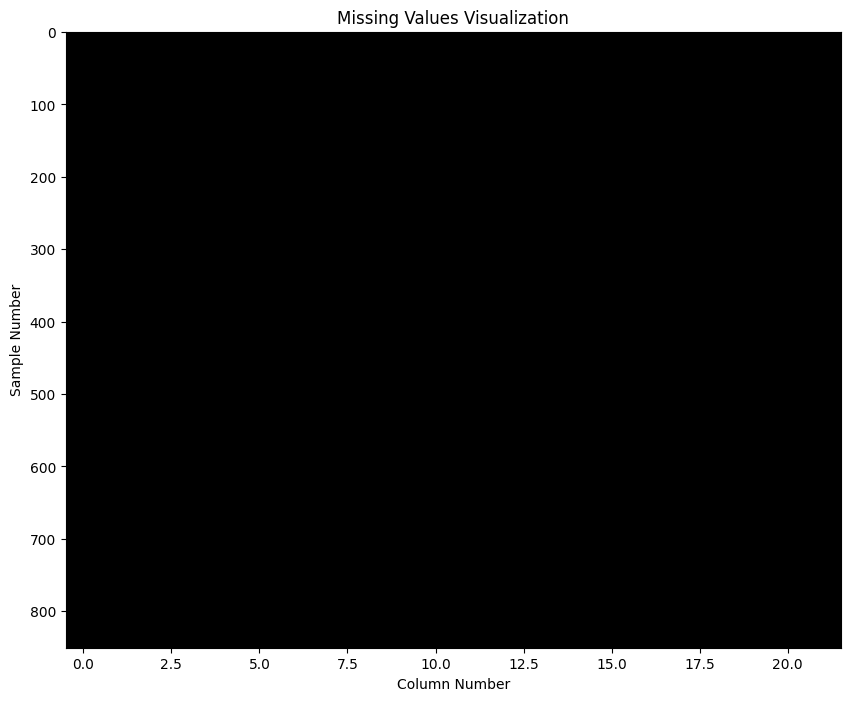

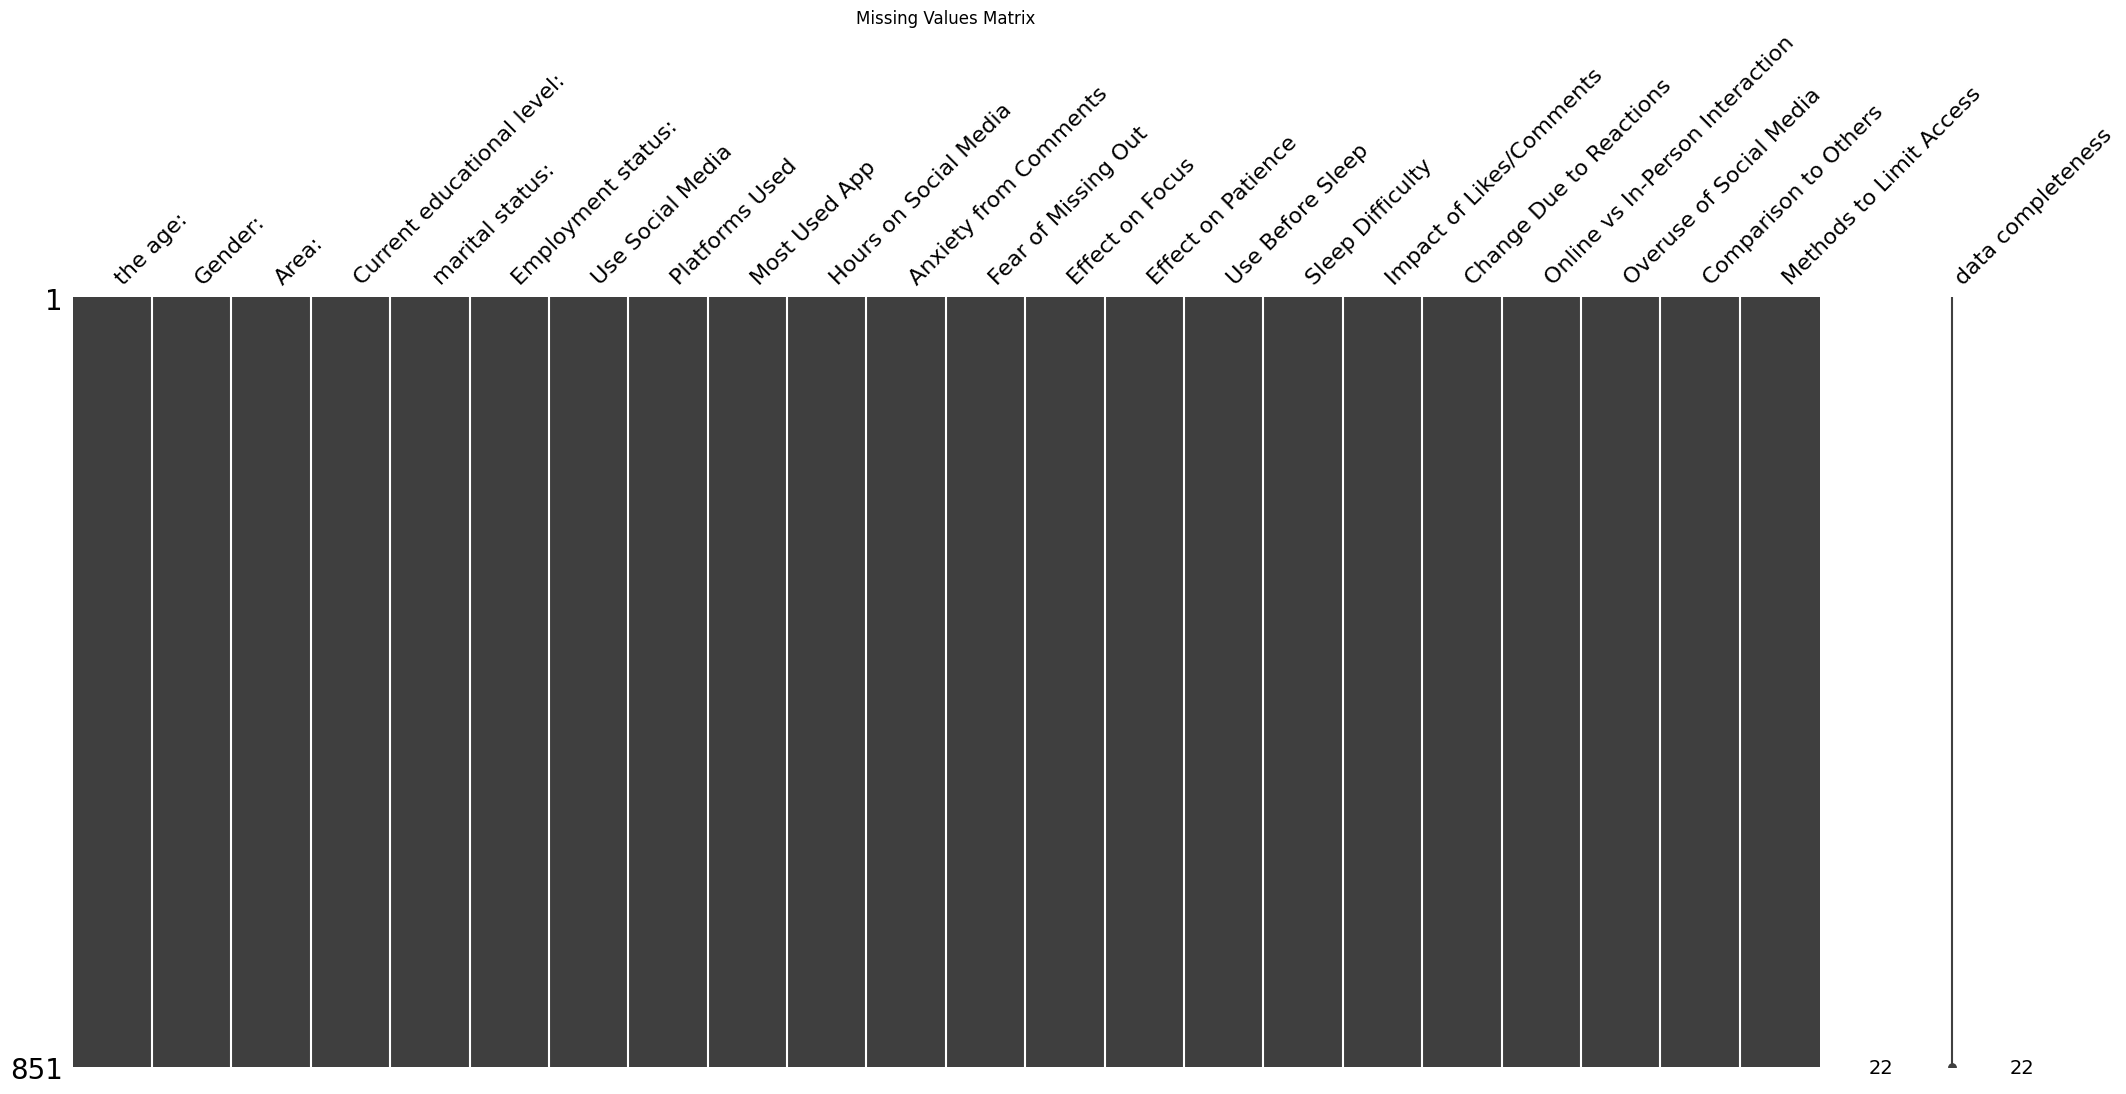

In [385]:

# a. Visualize missing values using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("Missing Values Visualization")
plt.show()

# b. Visualize missing values using missingno
msno.matrix(df, labels=True, sort="descending")
plt.title("Missing Values Matrix")
plt.show()

##### 2.2.2. Per Feature
checking how much data is missing in each row of your dataset. This helps identify rows with lots of missing values, which could impact your analysis.

<Axes: title={'center': 'Percentage of missing values per feature'}, ylabel='Ratio of missing values per feature'>

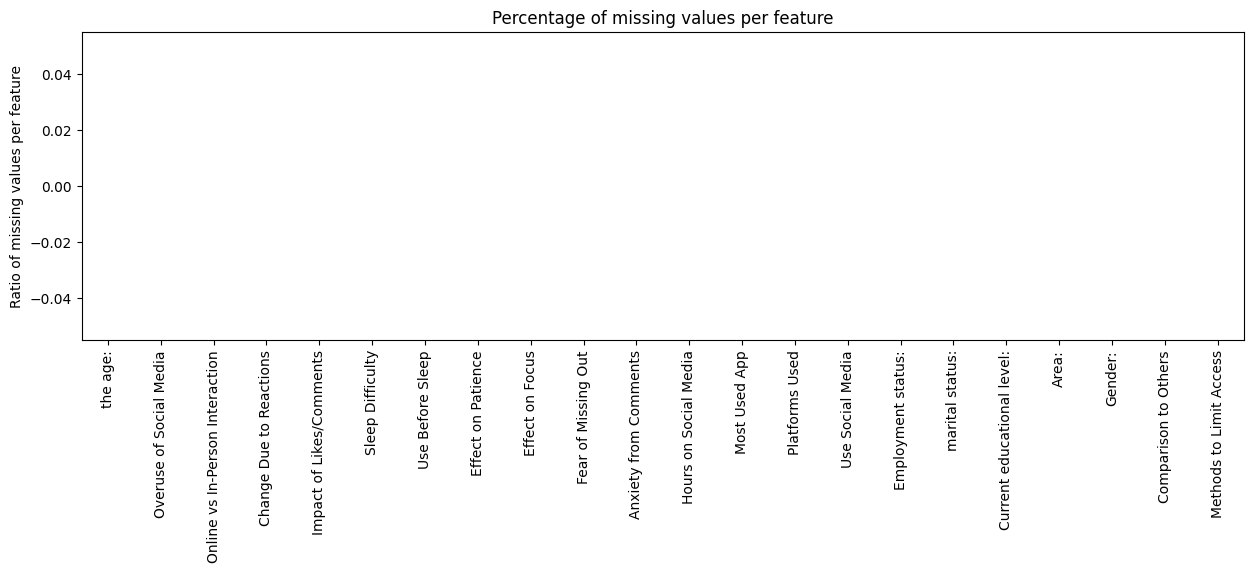

In [386]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature")

#### 2.3. Unwanted entries and recording errors

##### 2.3.1. Non-Numerical features

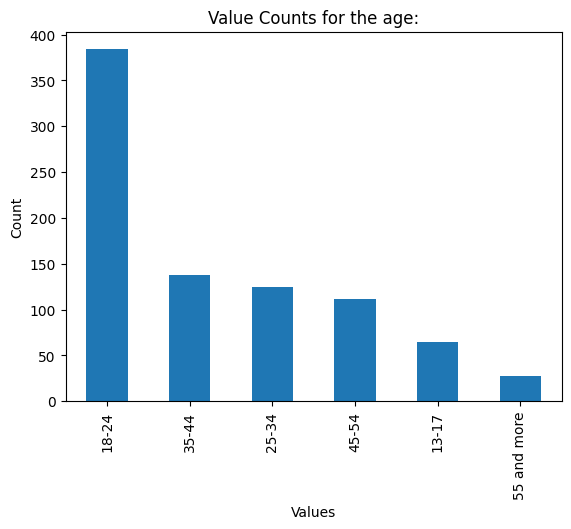

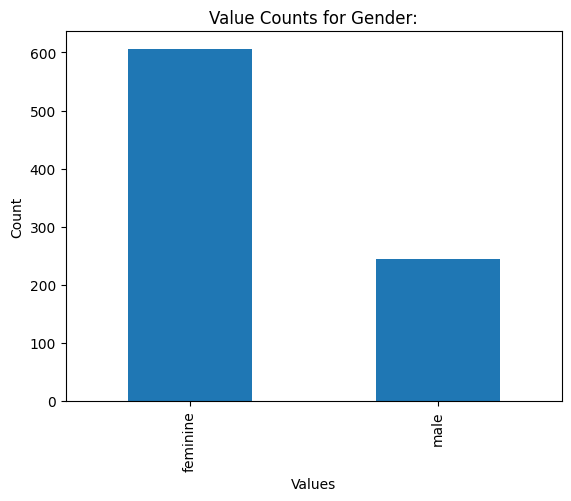

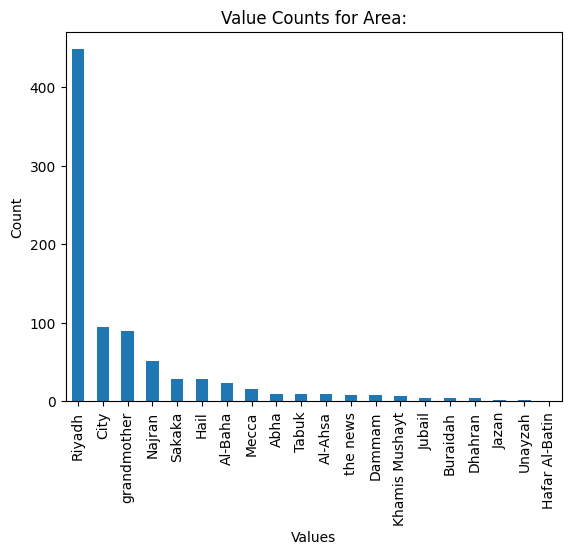

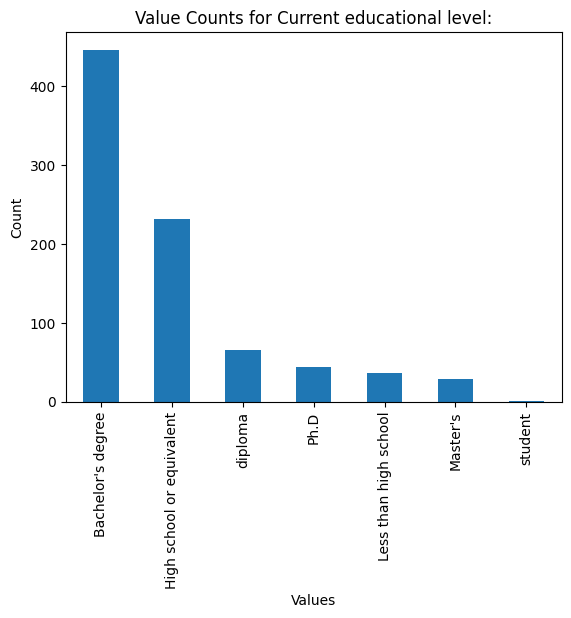

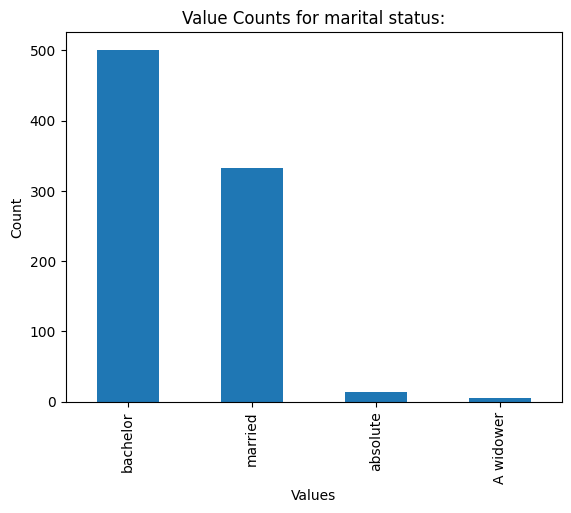

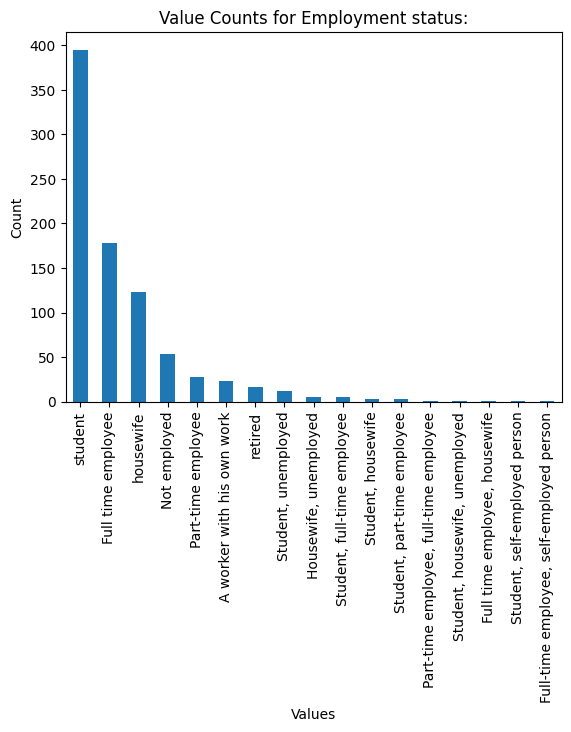

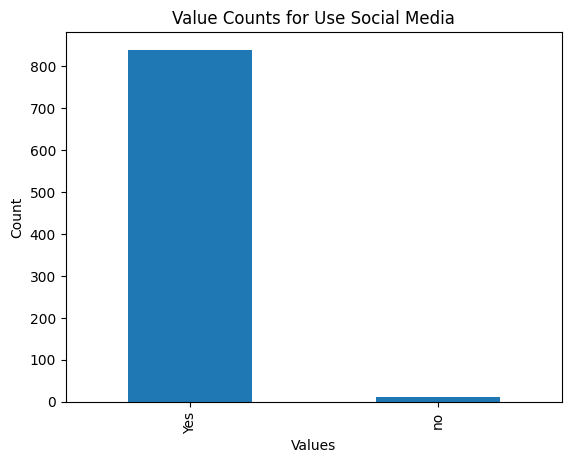

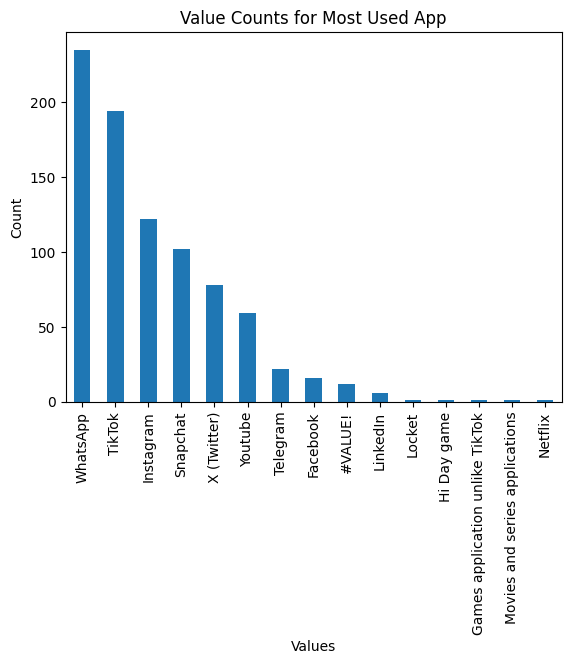

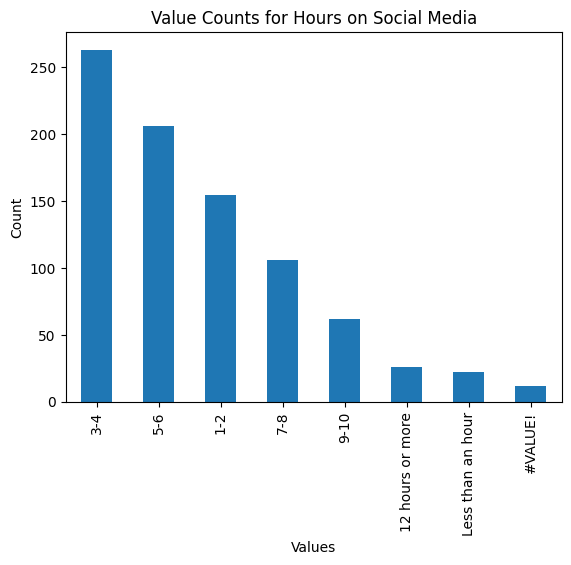

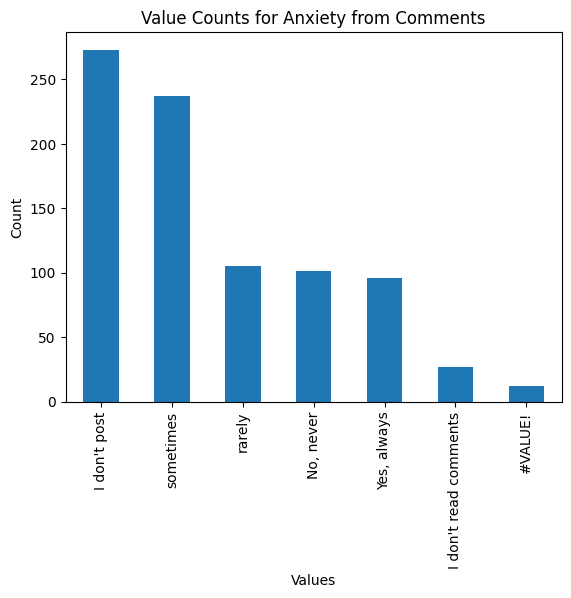

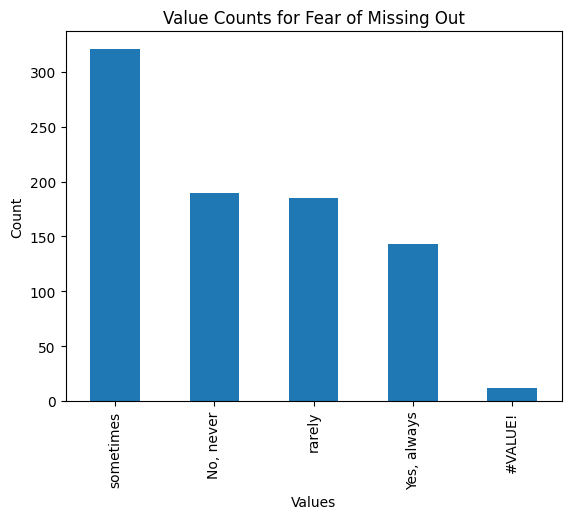

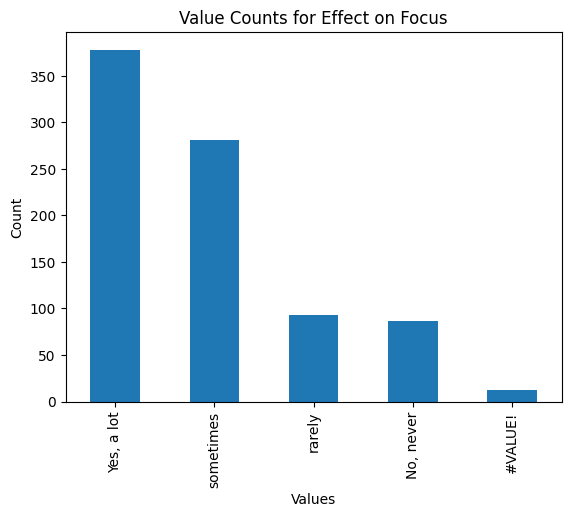

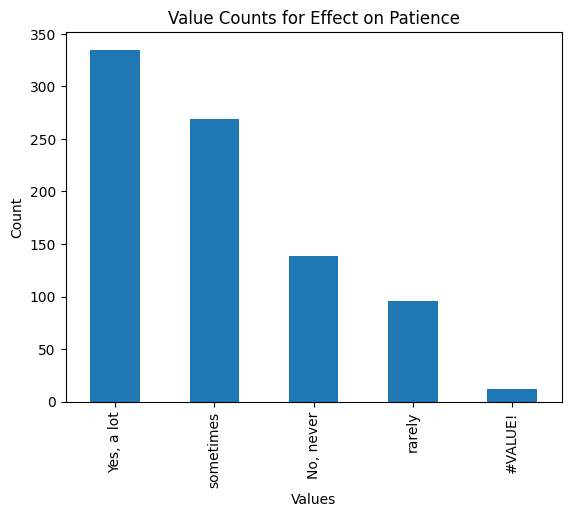

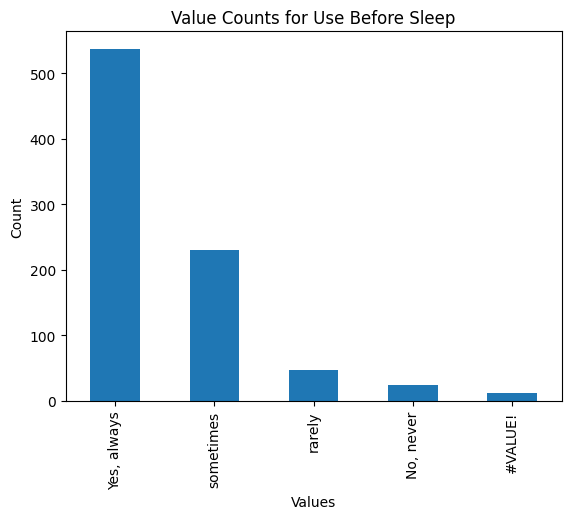

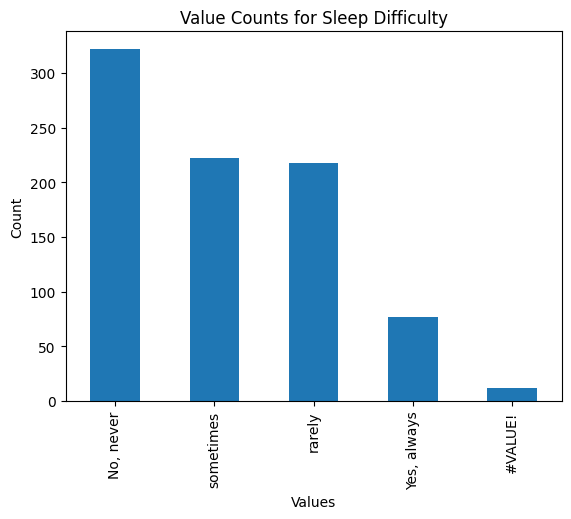

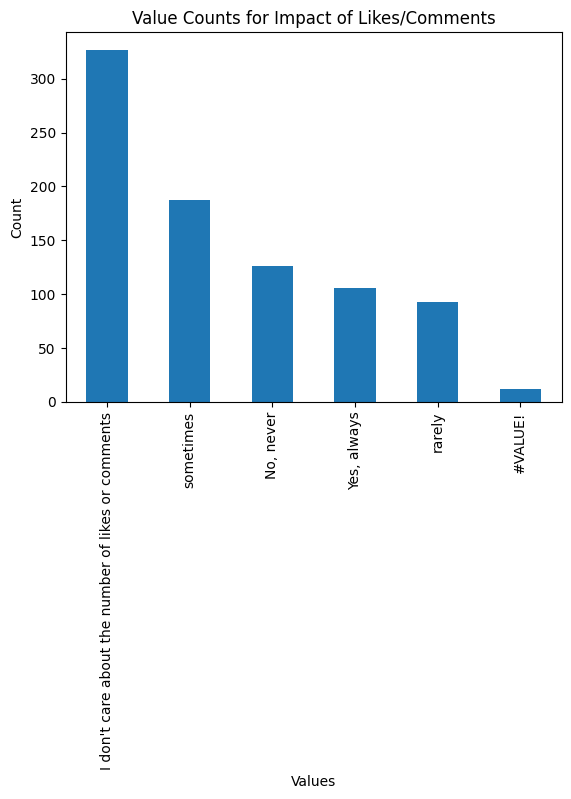

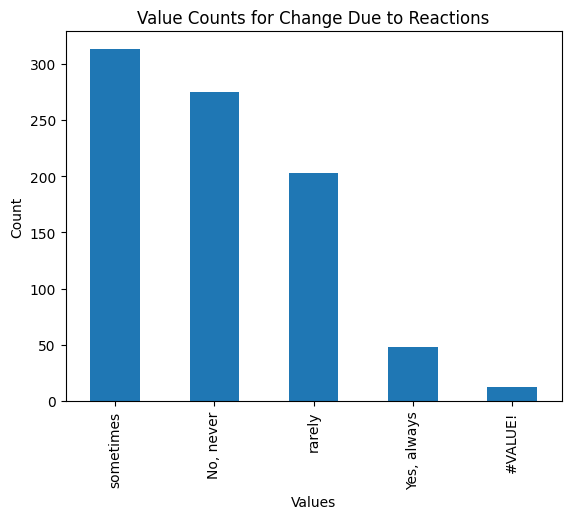

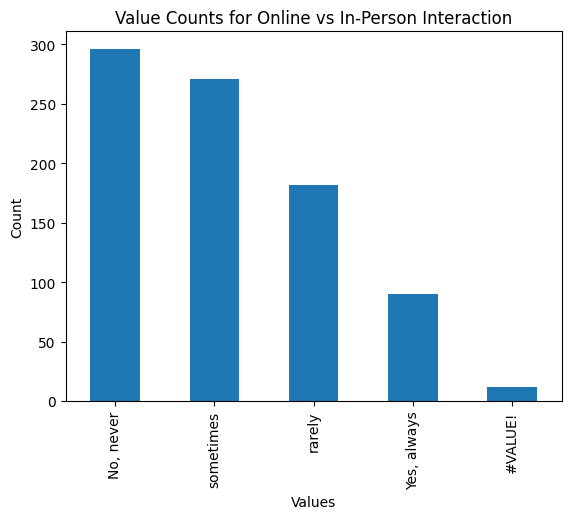

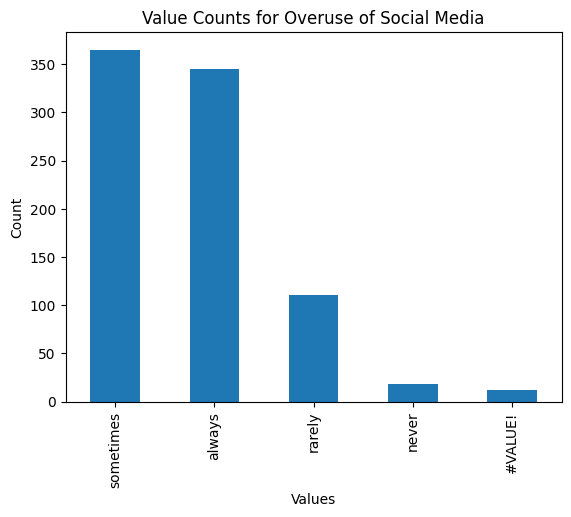

In [387]:
# List of column indices to exclude
exclude_indices = [7, 20, 21]

# Loop through each object-type column and plot the value counts, excluding the specified indices
for i, column in enumerate(df.select_dtypes(include=['object']).columns):
    if i not in exclude_indices:
        df[column].value_counts().plot(kind='bar', title=f"Value Counts for {column}")
        plt.xlabel('Values')
        plt.ylabel('Count')
        plt.show()


### Values for Methods to Limit Access

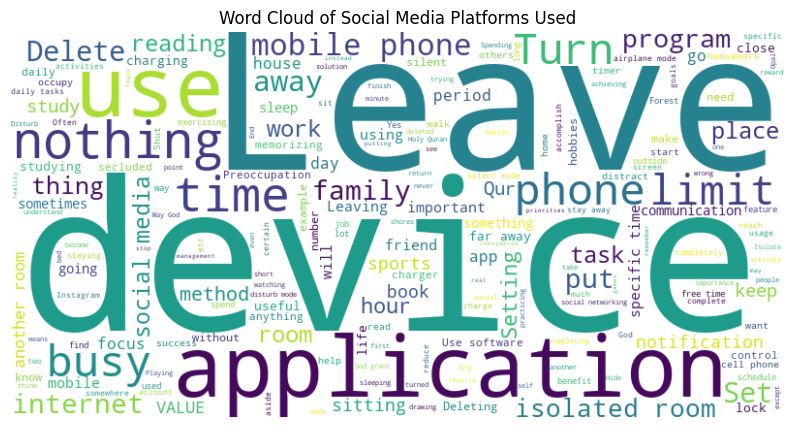

In [388]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_column = df['Methods to Limit Access']
text_column = text_column.dropna()

text = ' '.join(text_column)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Social Media Platforms Used')
plt.show()


### Values for Methods to Limit Access

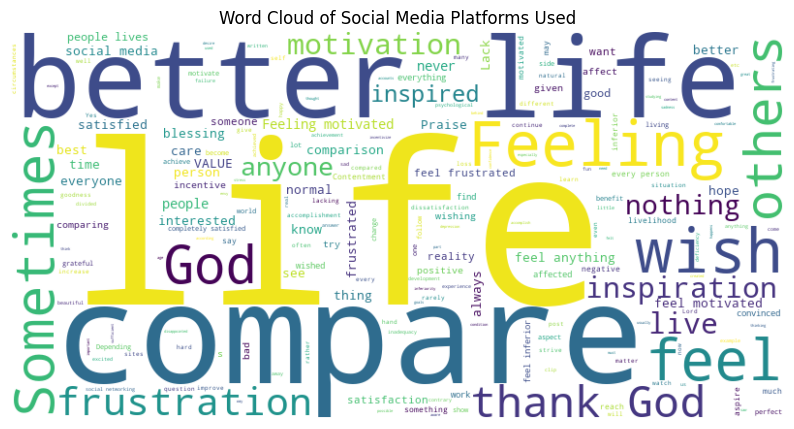

In [389]:
text_column = df['Comparison to Others']

text_column = text_column.dropna()

text = ' '.join(text_column)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Social Media Platforms Used')
plt.show()

### Values for Methods Platforms used

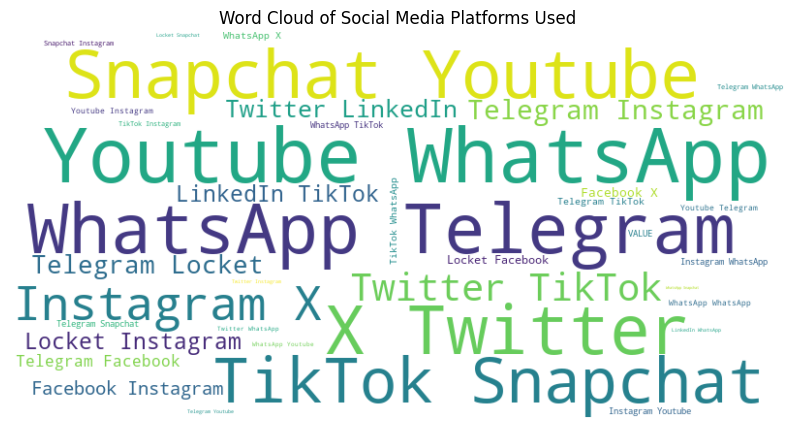

In [390]:

text_column = df['Platforms Used']

text_column = text_column.dropna()

text = ' '.join(text_column)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Social Media Platforms Used')
plt.show()

The word cloud visually represents the frequency of social media platforms used by individuals, with larger words indicating platforms that are used more frequently. In this cloud, WhatsApp stands out as the most frequently mentioned platform, followed by Telegram, TikTok, Instagram, and Snapchat. The size of each platform's name corresponds to how often it appears in the dataset, reflecting the popularity of these platforms among users. This provides a quick overview of the most commonly used social media platforms.

#### 3. Content Investigation

#### 3.1. Feature distribution

Now we will examine how values are spread or distributed across a specific feature (column) in the dataset. This helps us understand patterns, identify outliers, or detect skewness, which can impact the analysis or modeling process. Distribution can be visualized with histograms, bar charts, or box plots to give a clearer picture.

In [391]:
import pandas as pd
import matplotlib.pyplot as plt


# Generate histograms for each numerical column in the DataFrame
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    df[column].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)  # Turn off the grid to make the plot cleaner
    plt.show()

#### 3.2. Feature patterns

Now, we look for relationships or trends within the data, such as correlations, repetitive behaviors, or interactions between features. Identifying these patterns helps understand how different features affect the target variable and can guide feature engineering or selection for modeling.

#### 3.2.1. Continuous features
There's no numerical or datetime columns, nothing to plot.

#### 3.2.2. Discrete and ordinal features

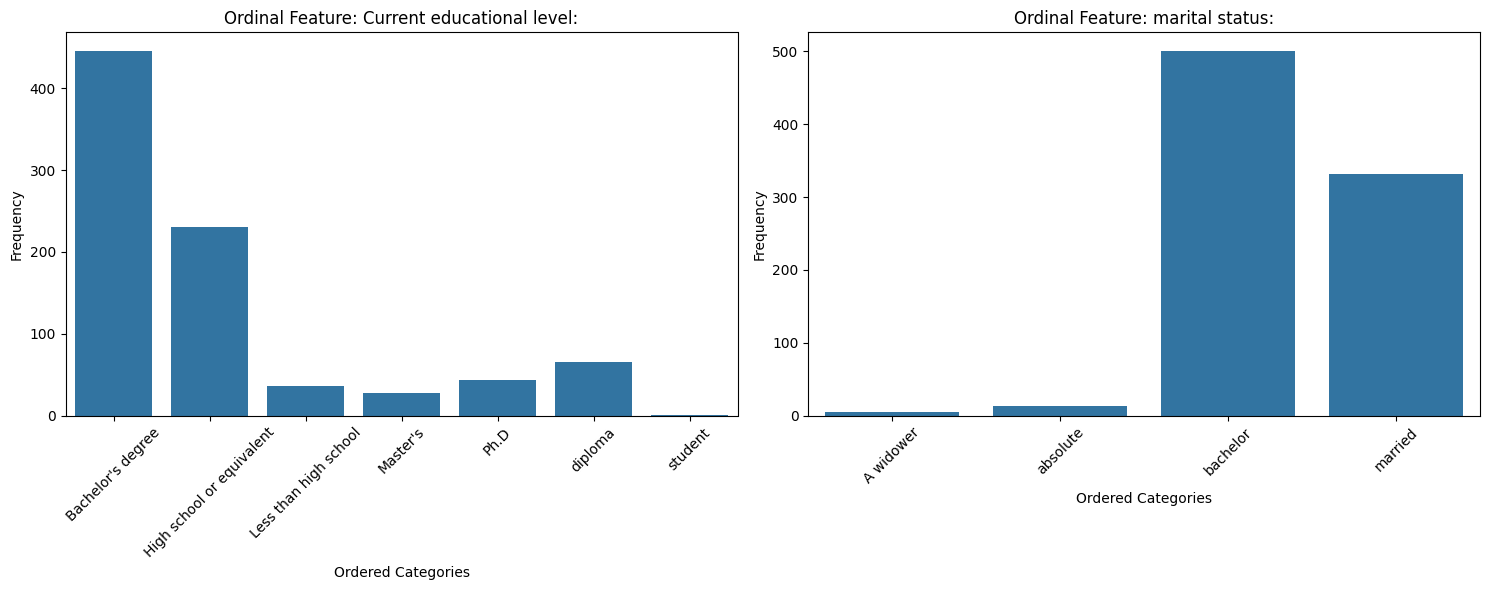

In [392]:
import seaborn as sns
import matplotlib.pyplot as plt

# Manually specify the ordinal features
ordinal_features = ['Current educational level:', 'marital status:']

# Set up the subplot grid (1 row, multiple columns)
num_features = len(ordinal_features)
fig, axes = plt.subplots(1, num_features, figsize=(15, 6))  # Adjust the figsize as needed

# Loop through the features and plot each in a separate subplot
for i, column in enumerate(ordinal_features):
    sns.countplot(x=column, data=df, order=sorted(df[column].unique()), ax=axes[i])
    axes[i].set_title(f"Ordinal Feature: {column}")
    axes[i].set_xlabel('Ordered Categories')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x labels for better visibility

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



#### 3.3. Feature relationships

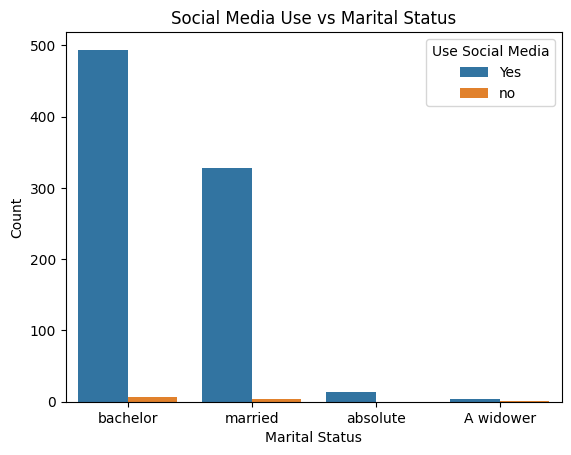

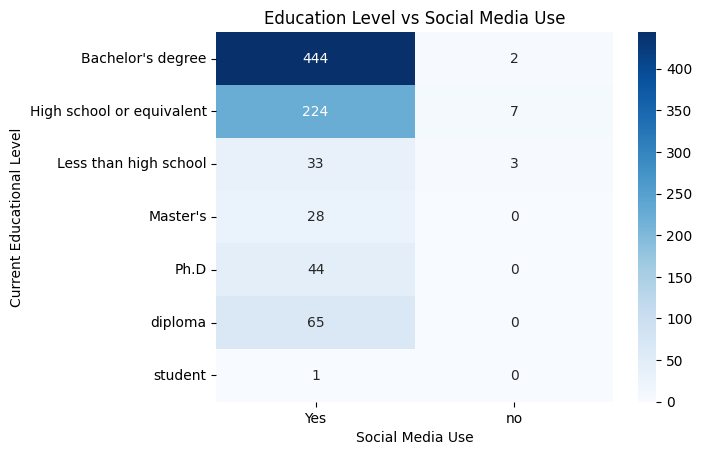

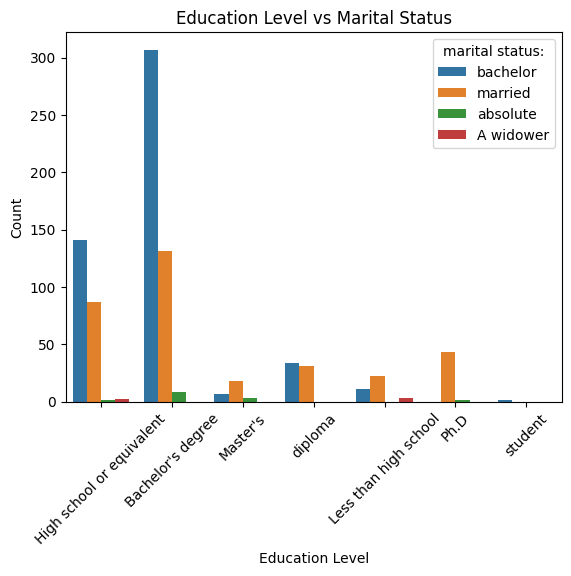

In [393]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean column names to avoid issues
df.columns = df.columns.str.strip()

# Select a few key categorical features for analysis
key_categorical_features = ['Current educational level:', 'marital status:', 'Use Social Media']

# 1. Stacked Bar Chart: Marital Status vs Social Media Use (as an example)
sns.countplot(x="marital status:", hue="Use Social Media", data=df)
plt.title("Social Media Use vs Marital Status")
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# 2. Cross-tab Heatmap: Education level vs Social Media Use
cross_tab = pd.crosstab(df['Current educational level:'], df['Use Social Media'])
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.title("Education Level vs Social Media Use")
plt.ylabel('Current Educational Level')
plt.xlabel('Social Media Use')
plt.show()

# 3. Pairwise Relationship: Educational Level vs Marital Status (with countplot)
sns.countplot(x='Current educational level:', hue='marital status:', data=df)
plt.title("Education Level vs Marital Status")
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


### 3.4. Conclusion of Content Investigation

The analysis of various factors such as **hours spent on social media**, **anxiety from comments**, and **FOMO** reveals important patterns in the behavior and mental health effects of social media use. **Histograms** show that the majority of respondents spend relatively low amounts of time on social media, with a significant number of people spending 3-5 hours daily. The distribution of **anxiety from comments** and **FOMO** indicates that many individuals experience moderate levels of anxiety, with a few reporting high anxiety, especially in the context of likes and comments.

Furthermore, the **impact of likes/comments** is also highly skewed, with the majority of users feeling a moderate to strong impact from social media engagement. These results are consistent across most mental health outcomes, with certain peaks and outliers suggesting more intense feelings of social media-related distress in a subset of the population.

The **ordinal features** of **education level** and **marital status** reveal interesting relationships with social media use. The data shows a higher frequency of social media use among those with a **Bachelor’s degree** and **high school education**, with fewer users from other educational levels. In terms of **marital status**, **bachelors** seem to use social media the most, while **married individuals** use it less frequently, although this difference is minimal.

Overall, the results show a broad trend of moderate to high social media-related effects on mental health, particularly anxiety and FOMO. The educational background and marital status offer further insights into the profiles of social media users, with certain groups, like bachelors and those with a bachelor's degree, engaging more heavily with social media platforms.

These findings highlight the diverse experiences users have with social media, which may be influenced by various demographic factors, and point to the need for tailored interventions to address the mental health impacts associated with its use.



### ***4. Data Cleaning***

#### 4.1 Handling Missing Values

In [394]:
print(df.isnull().sum())

the age:                           0
Gender:                            0
Area:                              0
Current educational level:         0
marital status:                    0
Employment status:                 0
Use Social Media                   0
Platforms Used                     0
Most Used App                      0
Hours on Social Media              0
Anxiety from Comments              0
Fear of Missing Out                0
Effect on Focus                    0
Effect on Patience                 0
Use Before Sleep                   0
Sleep Difficulty                   0
Impact of Likes/Comments           0
Change Due to Reactions            0
Online vs In-Person Interaction    0
Overuse of Social Media            0
Comparison to Others               0
Methods to Limit Access            0
dtype: int64


#### 4.2 Handling Non-Numeric Data
#### 4.3 Handling Outliers

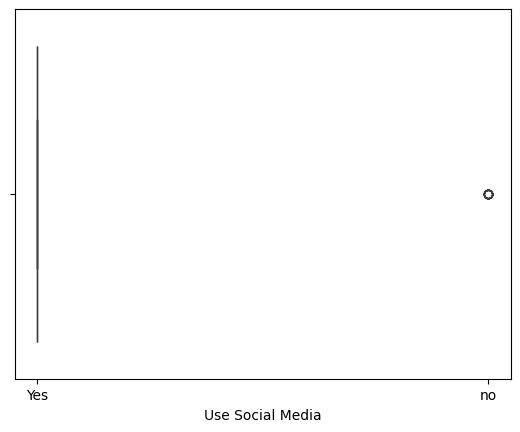

In [395]:
sns.boxplot(x=df['Use Social Media'])
plt.show()

'Use Social Media' has outlier. We filtered the dataset to keep only the rows where the 'Use Social Media' column is 'Yes', then removed the 'Use Social Media' column entirely from the DataFrame since we ensured that the dataset is about people who use social media.


#### 4.4 Removing '#VALUE!' value

In [397]:
# Remove rows where any column contains the value '#VALUE!'
df = df.replace('#VALUE!', pd.NA)  # Replace '#VALUE!' with NaN (missing value)
df = df.dropna()  # Drop rows with NaN values



### ***5. Data Pre-Prossesing***
Data Transformation Here, we identified and replaced inconsistent or incorrect values in our dataset. For example, we replaced "feminine" with "Female" in the Gender column and corrected city names like "grandmother" to "Jeddah," "the news" to "Khobar," and "City" to "Madinah" in the City column.

In [398]:
# Replace "feminine" with "Female" in the Gender column
df['Gender:'] = df['Gender:'].replace("feminine", "Female")

# Replace incorrect city names in the City column
df['Area:'] = df['Area:'].replace({
    "grandmother": "Jeddah", 
    "the news": "Khobar", 
    "City": "Madinah"
})

# Display a sample of the updated dataset
print("\nUpdated data sample after replacing incorrect words:")
print(df[['Gender:', 'Area:']].head(250))


Updated data sample after replacing incorrect words:
    Gender:   Area:
0    Female  Riyadh
1      male  Riyadh
2    Female  Riyadh
3    Female  Riyadh
4    Female  Riyadh
..      ...     ...
248  Female  Jeddah
249  Female  Riyadh
250    male  Riyadh
251  Female    Abha
252  Female  Riyadh

[250 rows x 2 columns]


#### Range(1-5): 

Now, we are converting the survey responses into a numerical range from 1 to 5. This step ensures that the data is standardized and ready for analysis.

In [399]:
columns_to_convert = [

    'Anxiety from Comments',
       'Fear of Missing Out', 'Effect on Focus', 'Effect on Patience',
       'Use Before Sleep', 'Sleep Difficulty', 'Impact of Likes/Comments',
       'Change Due to Reactions', 'Online vs In-Person Interaction',
       'Overuse of Social Media', 
]

response_mapping = {
    "Yes, always": 1,
    "always": 1,
    "Yes, a lot": 2,
    "often": 2,
    "sometimes": 3,
    "Rarely": 4,
    "rarely": 4,
    "No, never": 5,
    "never": 5,
    "I don't post": 5,
    "I don't read comments":5,
    "I don't care about the number of likes or comments" :5

}

for column in columns_to_convert:
    df[column] = df[column].replace(response_mapping)


/var/folders/b5/7tmwqhdn6zq6c37j1884g9tc0000gn/T/ipykernel_57139/2164678035.py:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace(response_mapping)


Now, you can apply this adjusted mapping to the column, and it will better reflect the actual range of hours.

In [400]:

response_mapping = {
    "Less than an hour": 0,
    "1-2": 1,
    "3-4": 3,
    "5-6": 5,
    "7-8": 7,
    "9-10": 9,
    "12 hours or more": 12
}

# Specify the column to preprocess (replace with the actual column name in your DataFrame)
column_to_preprocess = 'Hours on Social Media'

# Step 2: Map the valid responses to their numerical values based on the new mapping
df[column_to_preprocess] = df[column_to_preprocess].map(response_mapping)



### ***6. Open-ended question analysis***
The goal is to categorize the responses into thematic groups and determine the sentiment of the respondents. The survey question being analyzed is: "How do you feel when you compare your life to the lives of others on social media?". By examining the language used in the responses, we aim to uncover patterns in how individuals perceive the impact of social media on their lives, categorizing the responses into key themes such as inspiration, frustration, and satisfaction, while also determining whether the sentiments expressed are positive, negative, or neutral.

#### Q1: How do you feel when you compare your life to the lives of others on social media?
To analyze how people feel when comparing their lives to others on social media, we employed Sentiment Analysis using VADER and Thematic Categorization with predefined keywords to detect themes such as inspiration or frustration. We filtered out non-expressive texts to focus on meaningful responses. Results were visualized using Matplotlib, revealing a mix of positive, neutral, and negative sentiments. This comprehensive approach provided insights into the diverse emotional impacts of social media comparisons, highlighting a significant occurrence of positive responses.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/refalammari/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


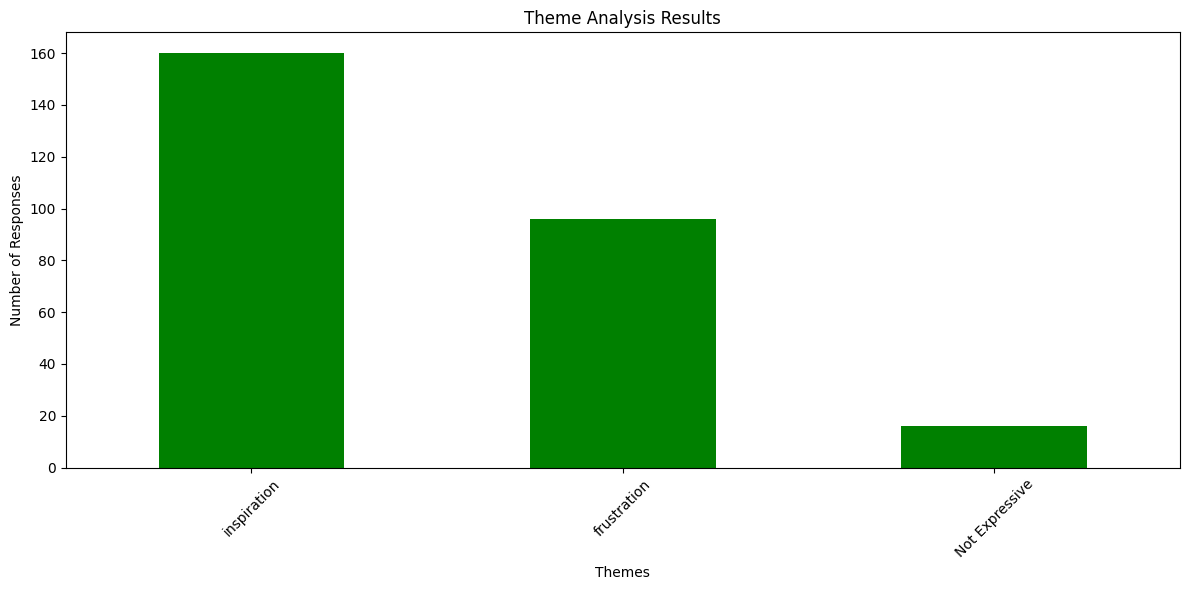

In [401]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter

# Ensure NLTK VADER lexicon is downloaded
import nltk
nltk.download('vader_lexicon')

if 'Comparison to Others' in df.columns:
    sia = SentimentIntensityAnalyzer()
else:
    print("The column is not in the dataset.")

# Function to check for meaningless text
def is_meaningless(text):
    return bool(re.match(r'^\W*$', text.strip()))

# Defining themes with keywords
themes = {
    'inspiration': [
        'inspire', 'motivate', 'challenge', 'change', 'development', 
        'skills', 'learn', 'positive', 'motivation', 'accomplish', 
        'achieve', 'incentive', 'aspiration', 'striving', 'motivated',
        'inspired', 'satisfied'
    ],
    'frustration': [
        'frustration', 'inadequacy', 'incomplete', 'sadness', 'lack', 
        'inferior', 'dissatisfaction', 'self-blame', 'helpless', 'anxiety', 
        'negative', 'loss', 'worried', 'frustrated', 'broken'
    ],
    # Add other themes similarly...
}

# Theme categorization function
def categorize_theme(text):
    if is_meaningless(text):
        return 'Not Expressive'
    tokens = re.findall(r'\b\w+\b', text.lower())
    for theme, keywords in themes.items():
        if any(token in keywords for token in tokens):
            return theme
    return 'Other'

# Sentiment analysis function
def categorize_sentiment(text):
    if is_meaningless(text):
        return 'Not Expressive'
    score = sia.polarity_scores(text)['compound']
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
    

    # Applying the categorization functions
df['Theme'] = df['Comparison to Others'].apply(categorize_theme)
df['Sentiment'] = df['Comparison to Others'].apply(categorize_sentiment)

# Counting themes and sentiments
theme_counts = df['Theme'].value_counts()
sentiment_counts = df['Sentiment'].value_counts()

# Plot for Theme Analysis Results
plt.figure(figsize=(12, 6))
theme_counts[theme_counts.index != 'Other'].plot(kind='bar', color='green')
plt.title('Theme Analysis Results')
plt.xlabel('Themes')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The chart shows a significant prevalence of 'Inspiration' as a theme, with a notable count also falling under 'Frustration'. Interestingly, a smaller segment of responses were categorized as 'Not Expressive'. This indicates that a good number of people find positive motivation or inspiration when making social media comparisons, contrary to the common assumption that such comparisons typically lead to negative emotions.

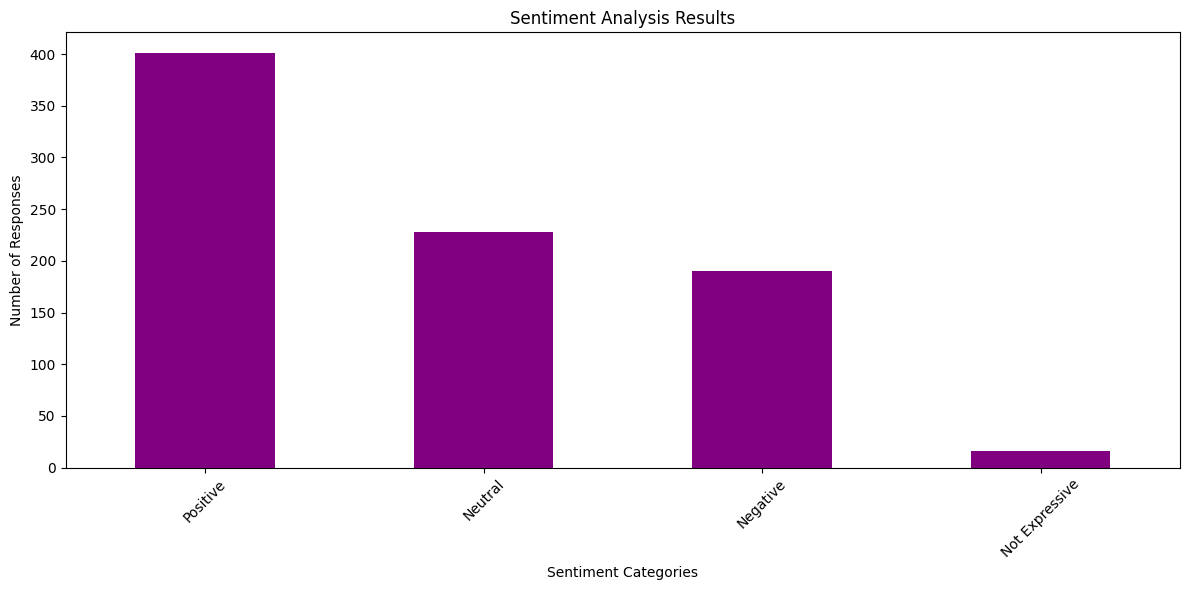

In [402]:

# Plot for Sentiment Analysis Results
plt.figure(figsize=(12, 6))
sentiment_counts.plot(kind='bar', color='purple')
plt.title('Sentiment Analysis Results')
plt.xlabel('Sentiment Categories')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In this "Sentiment Analysis Results" chart, the majority of responses were categorized as 'Positive', which is surprising. It was anticipated that negative sentiments would dominate due to the often-discussed negative impact of social media on self-esteem and happiness. However, the data shows a substantial number of neutral and positive sentiments, suggesting that not all social media comparisons lead to negative feelings. The 'Negative' category, while substantial, is not as dominant as hypothesized, and the 'Not Expressive' category is minimal.

These findings challenge the common narrative that comparing oneself to others on social media predominantly leads to negative emotions like envy, inadequacy, or sadness. Instead, it appears that many individuals derive inspiration or maintain a neutral stance. This could be indicative of a segment of social media users who have learned to extract positive value from these platforms, perhaps by following content that motivates personal growth or by maintaining a healthy perspective on social media portrayals.

#### Q2: What methods, if any, do you use to limit your social media access?
We enhanced our analysis from the foundational techniques used previously. Initially, our approach centered on tokenization, which involved breaking down each response into individual words or tokens, making it easier to systematically identify specific keywords and patterns mentioned by participants. These keywords related to strategies such as "time management," "tools," and "distraction" were then used to assign initial codes to each response. After mapping these codes to broader themes like "Time Management," "Application Limits," and "No/Nothing Responses," we visualized the frequency of each theme using a bar chart.

Building on this, our updated analysis involves more detailed preprocessing steps, like stopword removal to refine the focus on meaningful words and a more rigorous word frequency analysis. This allows us to capture deeper insights into the specific strategies used by individuals, offering a more detailed understanding of their approaches to managing social media usage.

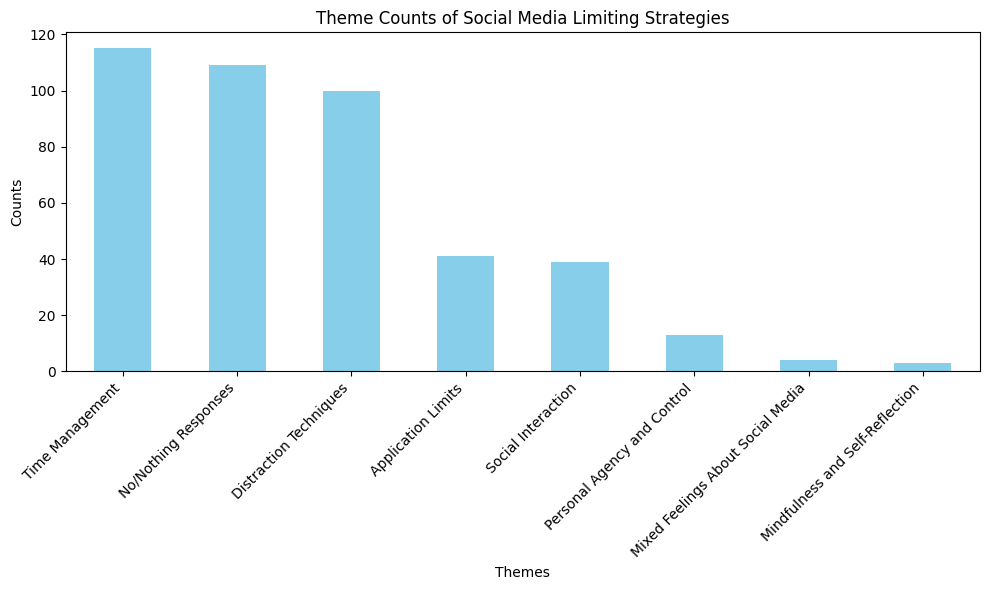

In [403]:
import pandas as pd
import matplotlib.pyplot as plt
import re


# Define a function to clean the responses
def clean_response(text):
    text = str(text).strip()
    if text in ['.', '', 'A', 'B', '??', '...']:
        return None
    return text

# Apply the cleaning function and drop missing values
df['cleaned_response'] = df['Methods to Limit Access'].apply(clean_response)
df = df.dropna(subset=['cleaned_response'])

# Tokenize the cleaned responses
def tokenize(text):
    return re.findall(r'\b\w+\b', text.lower())

df.loc[:, 'tokens'] = df['cleaned_response'].apply(tokenize)

# Define initial codes based on keywords
initial_codes = {
    'time_management': ['limit', 'time', 'hours', 'schedule', 'timer'],
    'tools': ['apps', 'blocker', 'delete'],
    'personal_strategies': ['detox', 'break', 'reward', 'go out', 'hobbies'],
    'distraction': ['busy', 'occupy', 'family', 'friends', 'chores'],
    'mindfulness': ['reflect', 'think', 'impact'],
    'social_interaction': ['gathering', 'friends', 'family'],
    'personal_control': ['control', 'decide', 'goals'],
    'mixed_feelings': ['enjoy', 'positive', 'reward'],
    'no_nothing': ['no', 'nothing'],
}

# Code responses based on tokens
def code_response(tokens):
    codes = []
    for code, keywords in initial_codes.items():
        if any(keyword in tokens for keyword in keywords):
            codes.append(code)
    return codes

df.loc[:, 'codes'] = df['tokens'].apply(code_response)

# Define themes based on codes
themes = {
    'Device Management': ['device_management'],
    'Application Limits': ['tools'],
    'Time Management': ['time_management'],
    'Mixed Feelings About Social Media': ['mixed_feelings'],
    'Distraction Techniques': ['distraction'],
    'Mindfulness and Self-Reflection': ['mindfulness'],
    'Social Interaction': ['social_interaction'],
    'Personal Agency and Control': ['personal_control'],
    'No/Nothing Responses': ['no_nothing'],
}

# Assign themes to responses
def assign_theme(codes):
    assigned_themes = []
    for theme, codes_list in themes.items():
        if any(code in codes for code in codes_list):
            assigned_themes.append(theme)
    return assigned_themes

df.loc[:, 'themes'] = df['codes'].apply(assign_theme)

# Count the frequency of each theme
theme_counts = df['themes'].explode().value_counts()

# Visualize the frequency of themes
plt.figure(figsize=(10, 6))
theme_counts.plot(kind='bar', color='skyblue')
plt.title('Theme Counts of Social Media Limiting Strategies')
plt.xlabel('Themes')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Now, To analyze the responses about limiting social media usage, we initially employed several text processing techniques. We started with tokenization, which involves breaking down the text into individual words or tokens. This step is crucial for parsing the raw data into a manageable form. We then applied a stopword removal process to filter out common words that do not contribute significantly to the meaning of the text, such as "the," "is," and "and." This helps focus on the more meaningful words that are relevant to our analysis. After these preprocessing steps, we utilized word frequency analysis to count how often each word appeared in the responses. This quantitative measure allowed us to identify the most commonly mentioned methods for limiting social media use, providing clear insights into popular strategies among the respondents. The resulting data was then visualized in a bar chart, highlighting the frequency of each significant word and offering a visual representation of the trends and patterns in the data

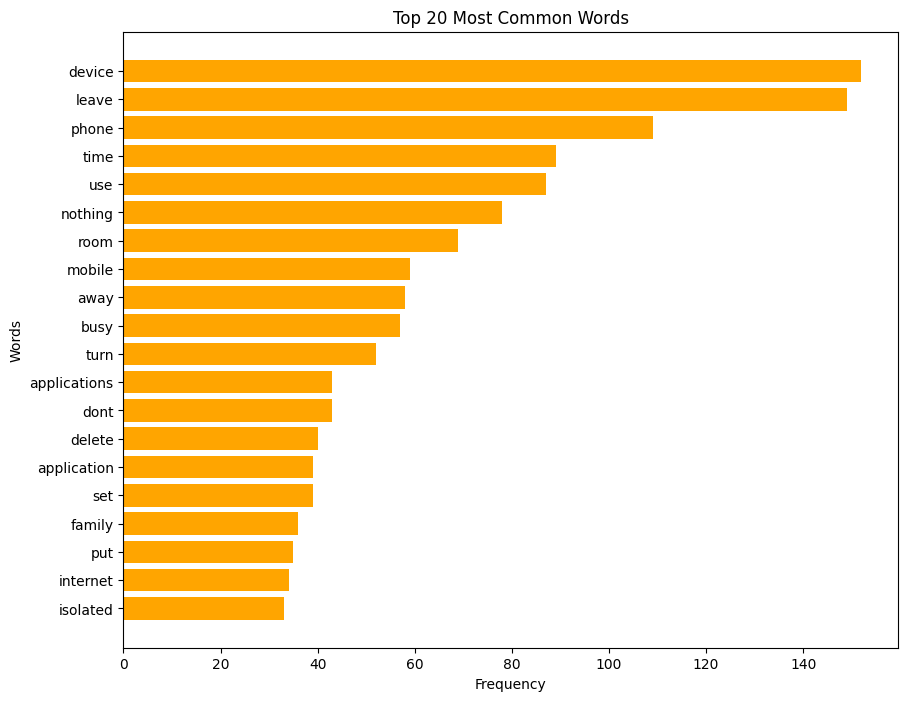

In [404]:
import pandas as pd
from collections import Counter
import string
import matplotlib.pyplot as plt



# Define a basic set of English stopwords
basic_stopwords = {'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours',
                   'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its',
                   'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these',
                   'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
                   'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against',
                   'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off',
                   'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
                   'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't',
                   'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't",
                   'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
                   'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't",
                   'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

# Function to clean and tokenize text using basic string operations
def simple_tokenize(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text by splitting on whitespace
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word not in basic_stopwords]
    return tokens

# Apply the simple tokenize function to the column and flatten the list of tokens
all_tokens = [token for response in df["Methods to Limit Access"].astype(str) for token in simple_tokenize(response)]

# Calculate word frequency
word_freq = Counter(all_tokens)

# Extract the top 20 words and their frequencies
top_words = word_freq.most_common(20)
words, frequencies = zip(*top_words)

# Plotting the frequencies of the most common words
plt.figure(figsize=(10, 8))
plt.barh(words, frequencies, color='orange')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency at the top
plt.show()


Looking at the bar chart displaying the top 20 most common words related to limiting social media usage, we can see that "device," "leave," and "phone" are among the most frequently mentioned. This suggests that common strategies involve physically distancing oneself from digital devices. The presence of words like "time" and "use" implies that setting time limits or specific usage rules are also popular methods. Interestingly, "nothing" ranks high, indicating a significant number of respondents do not use any specific strategies to limit their social media interaction.

### 7. Statistical Summarise:

In [405]:
import pandas as pd

summary = df.describe()

print(summary)

       Hours on Social Media  Anxiety from Comments  Fear of Missing Out  \
count             817.000000             817.000000           817.000000   
mean                4.238678               3.851897             3.342717   
std                 2.721658               1.327998             1.295751   
min                 0.000000               1.000000             1.000000   
25%                 3.000000               3.000000             3.000000   
50%                 3.000000               4.000000             3.000000   
75%                 5.000000               5.000000             4.000000   
max                12.000000               5.000000             5.000000   

       Effect on Focus  Effect on Patience  Use Before Sleep  \
count       817.000000          817.000000        817.000000   
mean          2.876377            3.048960          1.834761   
std           0.984260            1.085805          1.178178   
min           2.000000            2.000000          1.00000

- Time Spent on Social Media: The average time spent on social media is 4.24 hours per day, with the majority of people spending between 3 and 5 hours. Some individuals report spending up to 12 hours, which can be visualized with a box plot or histogram.
- Anxiety from Comments: The average score for anxiety from comments is 3.85, with most respondents scoring between 3 and 4. This shows moderate anxiety due to social media comments. A box plot or density plot would show this distribution, with some people reporting the highest level of anxiety (5) and others scoring lower.
- Fear of Missing Out (FOMO): The average FOMO score is 3.34, and most users report a score between 3 and 4. This suggests that many people experience moderate FOMO. A box plot or violin plot would highlight the spread and central tendency of FOMO.
- Effect on Focus: The average score for the effect of social media on focus is 2.88, with a range from 2 to 5. Most respondents report mild effects on focus, and this can be shown with a box plot, highlighting the concentration of scores around 2 to 3.
- Effect on Patience: The average effect on patience is 3.05, indicating a mild to moderate impact on patience. A violin plot would visually show the spread of this effect, with many reporting scores between 2 and 4.
- Use of Social Media Before Sleep: The average score here is 1.83, meaning most people do not use social media before bed. A bar plot or box plot would clearly show this trend, with values mostly clustered at 1 (no use) and some scoring 3 (using before sleep).

### Show the Variance

In [406]:
import pandas as pd

# Calculate the variance for all numerical columns
variance_all_columns = df.select_dtypes(include=['float64', 'int64']).var()

# Display the variance for all numerical columns
print("Variance for all numerical columns:")
print(variance_all_columns)

Variance for all numerical columns:
Hours on Social Media              7.407424
Anxiety from Comments              1.763578
Fear of Missing Out                1.678970
Effect on Focus                    0.968767
Effect on Patience                 1.178973
Use Before Sleep                   1.388104
Sleep Difficulty                   1.419418
Impact of Likes/Comments           1.877526
Change Due to Reactions            1.125051
Online vs In-Person Interaction    1.545114
Overuse of Social Media            1.432675
dtype: float64


The variance values for the numerical columns indicate the spread of responses in the dataset. Hours on Social Media has the highest variance (7.41), showing significant variation in the time spent on social media. Other columns like Anxiety from Comments (1.76), Fear of Missing Out (1.68), and Impact of Likes/Comments (1.88) show moderate variation in how people experience these issues. Effect on Focus (0.97) and Change Due to Reactions (1.13) have lower variance, indicating more consistency in responses. Use Before Sleep (1.39), Sleep Difficulty (1.42), Effect on Patience (1.18), Online vs In-Person Interaction (1.55), and Overuse of Social Media (1.43) all show moderate variation, suggesting a diverse range of experiences across these factors.

### ***8. Data Visualization***

The primary objective of this analysis is to visually explore key variables related to social media usage, its impact on distraction, and demographic factors. By creating visualizations, we seek to uncover patterns and insights that shed light on how various demographic groups interact with social media and how this influences their focus and behavior.

here we will show insights that are most relevant to our research question.

#### 1- How does the number of hours spent on social media correlate with mental health outcomes, and what specific effects might prolonged use have on well-being?

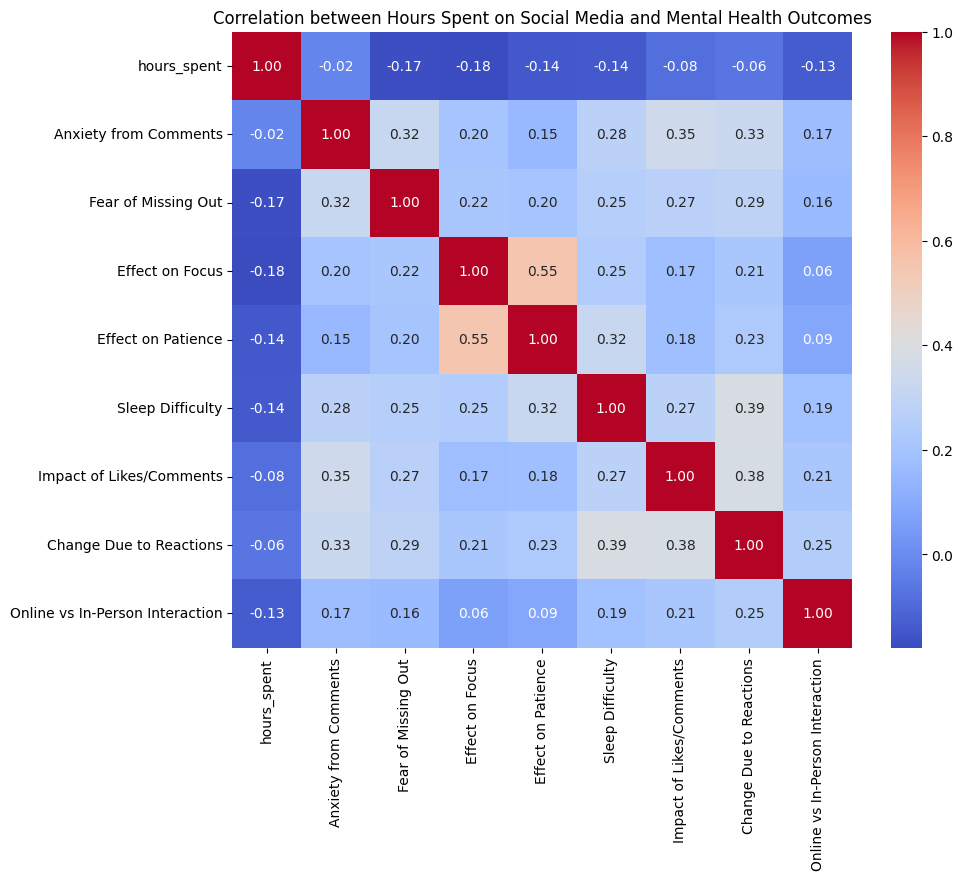

/var/folders/b5/7tmwqhdn6zq6c37j1884g9tc0000gn/T/ipykernel_57139/2205312358.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = df.groupby('hours_spent_category')['Effect on Focus'].mean().reset_index()
/var/folders/b5/7tmwqhdn6zq6c37j1884g9tc0000gn/T/ipykernel_57139/2205312358.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hours_spent_category', y='Effect on Focus', data=mean_scores, palette='coolwarm')


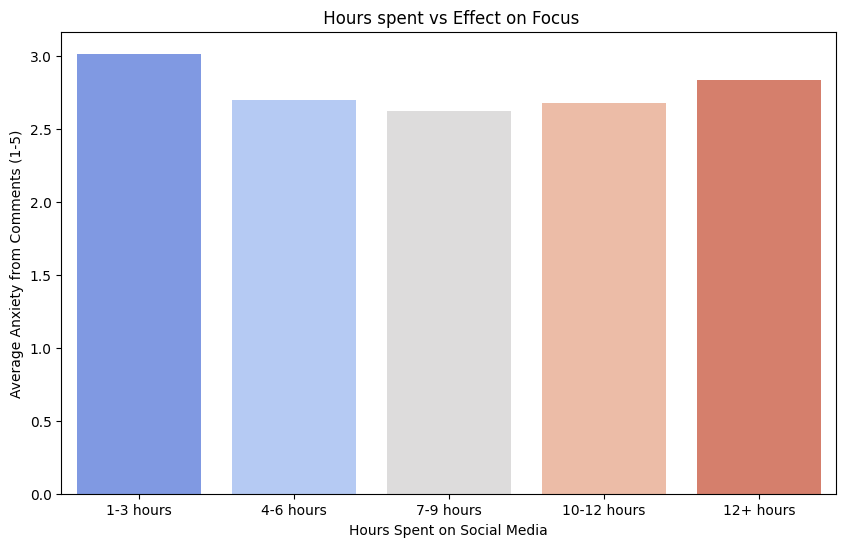

/var/folders/b5/7tmwqhdn6zq6c37j1884g9tc0000gn/T/ipykernel_57139/2205312358.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores = df.groupby('hours_spent_category')['Effect on Patience'].mean().reset_index()
/var/folders/b5/7tmwqhdn6zq6c37j1884g9tc0000gn/T/ipykernel_57139/2205312358.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hours_spent_category', y='Effect on Patience', data=mean_scores, palette='coolwarm')


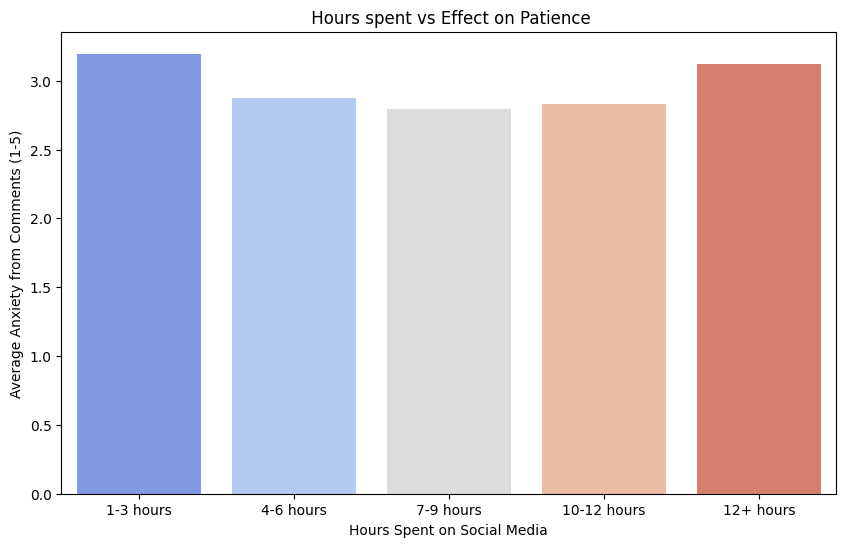

In [407]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Clean the 'Hours on Social Media' column: handle both string and numeric values
def clean_hours_spent(row):
    # Check if the value is a string (if it contains 'hours')
    if isinstance(row, str):
        if "hours" in row:
            if "or more" in row:
                return 12  # Assuming 12 or more is treated as 12
            else:
                return float(row.split()[0])  # Extract number of hours
    # If it's numeric, return it as is
    return row

# Apply the cleaning function to the 'Hours on Social Media' column
df['hours_spent'] = df['Hours on Social Media'].apply(clean_hours_spent)

# Ensure 'hours_spent' is numeric
df['hours_spent'] = pd.to_numeric(df['hours_spent'], errors='coerce')

# Drop rows where 'hours_spent' is NaN (if any non-numeric values existed)
df = df.dropna(subset=['hours_spent'])

# Select relevant columns for mental health analysis
mental_health_columns = [
    'Anxiety from Comments',
    'Fear of Missing Out',
    'Effect on Focus',
    'Effect on Patience',
    'Sleep Difficulty',
    'Impact of Likes/Comments',
    'Change Due to Reactions',
    'Online vs In-Person Interaction'
]

# Plot the correlation between hours spent on social media and mental health outcomes
correlation_data = df[["hours_spent"] + mental_health_columns]
correlation_matrix = correlation_data.corr()

# Plot heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Hours Spent on Social Media and Mental Health Outcomes")
plt.show()

# Now, categorize 'hours_spent' into bins (e.g., 0-3 hours, 4-6 hours, etc.)
df['hours_spent_category'] = pd.cut(df['hours_spent'], 
                                    bins=[0, 3, 5, 7, 10, 12], 
                                    labels=['1-3 hours', '4-6 hours', '7-9 hours', '10-12 hours', '12+ hours'])

# Calculate the mean of 'Anxiety from Comments' for each category of hours spent
mean_scores = df.groupby('hours_spent_category')['Effect on Focus'].mean().reset_index()

# Create a bar plot to show the average anxiety from comments by hours spent category
plt.figure(figsize=(10, 6))
sns.barplot(x='hours_spent_category', y='Effect on Focus', data=mean_scores, palette='coolwarm')
plt.title(" Hours spent vs Effect on Focus")
plt.ylabel("Average Anxiety from Comments (1-5)")
plt.xlabel("Hours Spent on Social Media")
plt.show()

# Calculate the mean of 'Anxiety from Comments' for each category of hours spent
mean_scores = df.groupby('hours_spent_category')['Effect on Patience'].mean().reset_index()

# Create a bar plot to show the average anxiety from comments by hours spent category
plt.figure(figsize=(10, 6))
sns.barplot(x='hours_spent_category', y='Effect on Patience', data=mean_scores, palette='coolwarm')
plt.title(" Hours spent vs Effect on Patience")
plt.ylabel("Average Anxiety from Comments (1-5)")
plt.xlabel("Hours Spent on Social Media")
plt.show()




### Correlation Insights:
- **Hours Spent on Social Media** have a **negative correlation** with **Anxiety from Comments** and **Fear of Missing Out (FOMO)**, but these correlations are **weak**. This suggests that spending more time on social media may not directly correlate with increased anxiety or FOMO in a significant way.
- **Effect on Focus** and **Effect on Patience** show a **positive correlation** with hours spent, especially for longer usage periods. The longer people spend on social media, the **stronger the effects** on their **focus** and **patience**.
- The **strongest correlation** is between **Effect on Focus** and **Effect on Patience**, showing that as one increases, the other tends to increase as well. This suggests that longer social media use negatively affects **both focus and patience**.

### Key Effects from Prolonged Use:
- **Shorter time on social media (1-3 hours)**: Users report relatively **lower levels of anxiety** and **FOMO**, and these feelings remain stable across different time intervals.
- **Longer time on social media (10-12 hours, 12+ hours)**: Prolonged use correlates with **higher anxiety** from comments, and **more severe effects** on **focus** and **patience**. Users show increasing discomfort as time spent increases, reflecting a potential negative impact on **mental well-being**.

In conclusion, **prolonged social media use** is linked to **worsened focus** and **patience**, with increasing anxiety levels at the extreme ends of use (10-12 hours or more), suggesting that users who spend excessive time on social media may experience negative impacts on their mental health and well-being.

#### 2- Do individuals with varying patterns of social media platform usage report different impacts on their mental health?

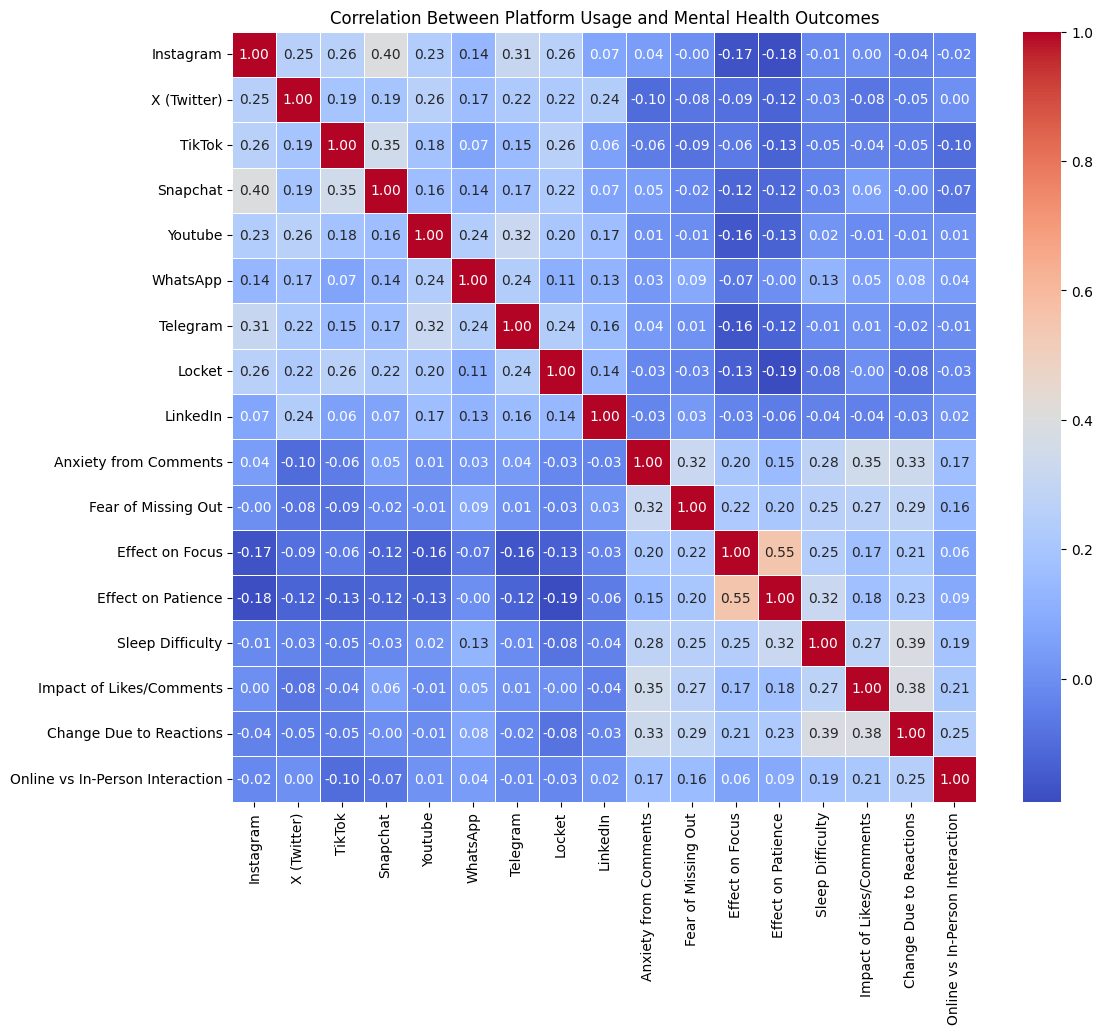

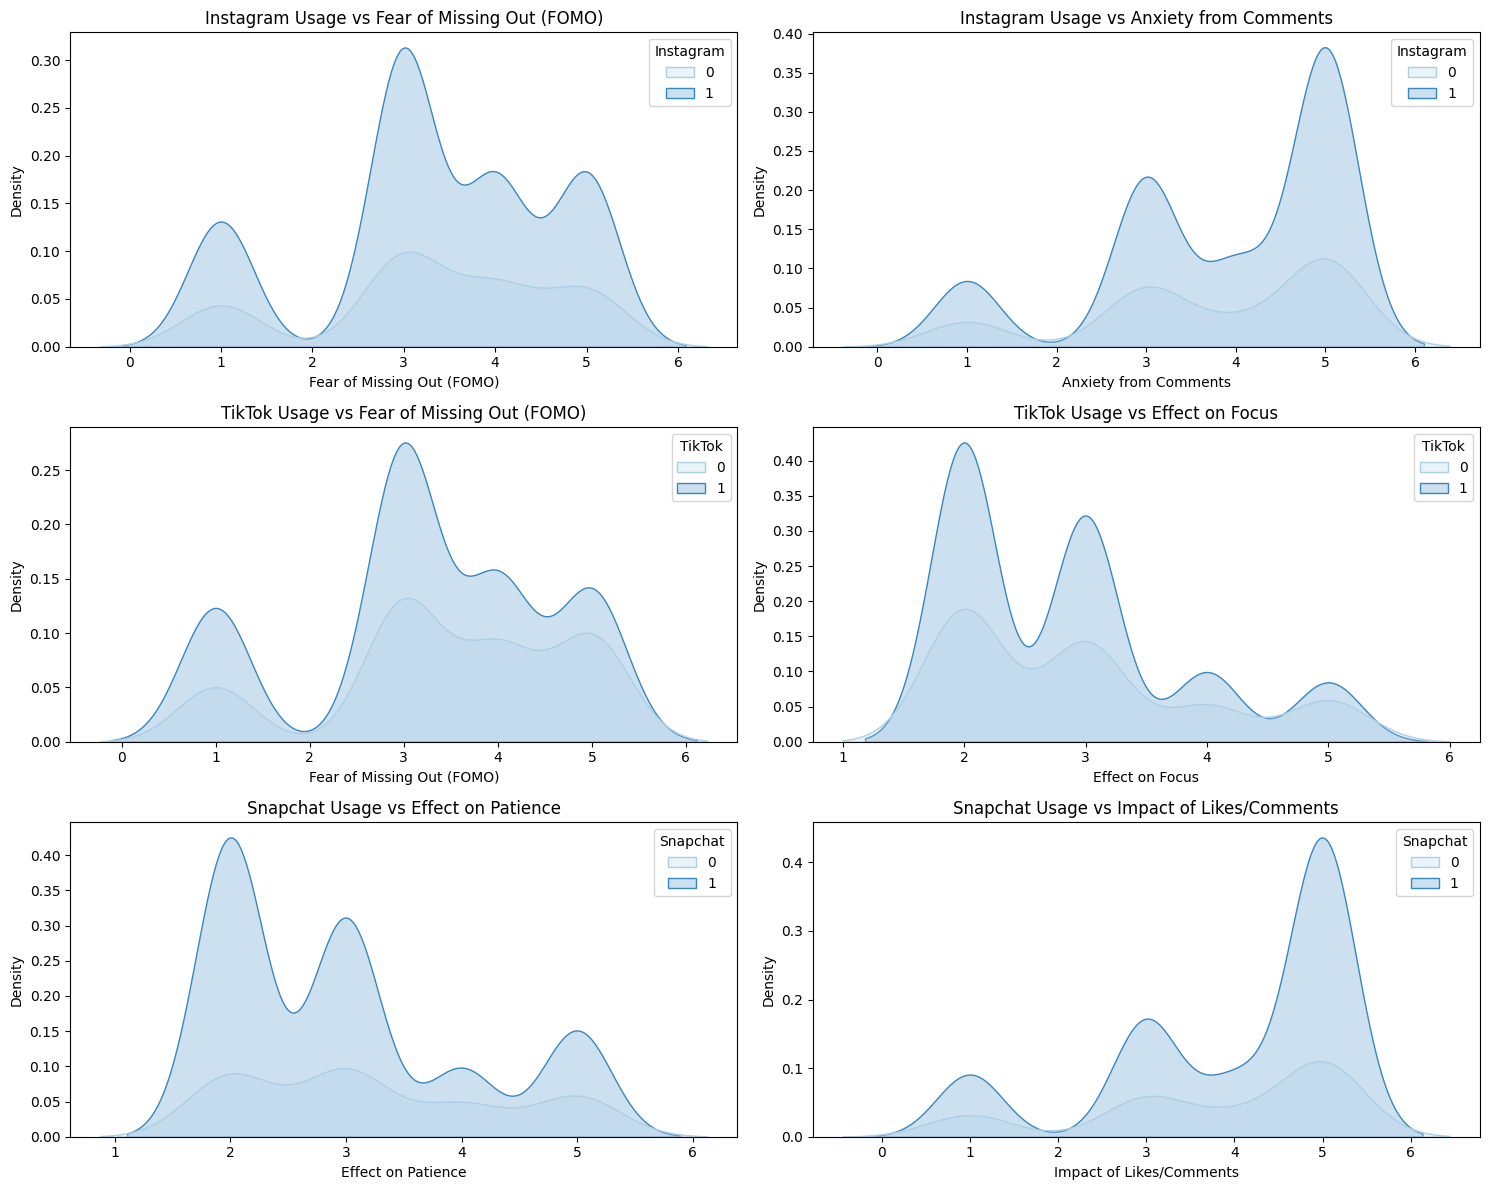

In [408]:
platforms = ['Instagram', 'X (Twitter)', 'TikTok', 'Snapchat', 'Youtube', 'WhatsApp', 'Telegram', 'Locket', 'LinkedIn']

for platform in platforms:
    df[platform] = df['Most Used App'].apply(lambda x: 1 if x == platform else 0)

# List of platforms
platforms = ['Instagram', 'X (Twitter)', 'TikTok', 'Snapchat', 'Youtube', 'WhatsApp', 'Telegram', 'Locket', 'LinkedIn']

# Function to categorize platform usage into binary (1 if used, 0 if not)
def categorize_platform_usage(platforms_list, platform_name):
    return 1 if platform_name in platforms_list else 0

# Split the 'Platforms Used' column into a list of platforms
df['Platforms Used'] = df['Platforms Used'].apply(lambda x: x.split(', '))

# Create binary columns for each platform
for platform in platforms:
    df[platform] = df['Platforms Used'].apply(lambda x: categorize_platform_usage(x, platform))

# Drop the original 'Platforms Used' column (optional)
df.drop(columns=['Platforms Used'], inplace=True)

# Create a correlation matrix between platforms and mental health outcomes
platform_columns = platforms
mental_health_columns = [
    'Anxiety from Comments',
    'Fear of Missing Out',
    'Effect on Focus',
    'Effect on Patience',
    'Sleep Difficulty',
    'Impact of Likes/Comments',
    'Change Due to Reactions',
    'Online vs In-Person Interaction',
]

# Calculate correlation between platforms and mental health outcomes
correlation_data = df[platform_columns + mental_health_columns]
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Between Platform Usage and Mental Health Outcomes")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

# Create density plots for each platform and mental health outcome
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Density plot for Instagram vs Fear of Missing Out (FOMO)
sns.kdeplot(data=df, x='Fear of Missing Out', hue='Instagram', fill=True, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title("Instagram Usage vs Fear of Missing Out (FOMO)")
axes[0, 0].set_xlabel("Fear of Missing Out (FOMO)")
axes[0, 0].set_ylabel("Density")

# Density plot for Instagram vs Anxiety from Comments
sns.kdeplot(data=df, x='Anxiety from Comments', hue='Instagram', fill=True, ax=axes[0, 1], palette='Blues')
axes[0, 1].set_title("Instagram Usage vs Anxiety from Comments")
axes[0, 1].set_xlabel("Anxiety from Comments")
axes[0, 1].set_ylabel("Density")

# Density plot for TikTok vs Fear of Missing Out (FOMO)
sns.kdeplot(data=df, x='Fear of Missing Out', hue='TikTok', fill=True, ax=axes[1, 0], palette='Blues')
axes[1, 0].set_title("TikTok Usage vs Fear of Missing Out (FOMO)")
axes[1, 0].set_xlabel("Fear of Missing Out (FOMO)")
axes[1, 0].set_ylabel("Density")

# Density plot for TikTok vs Effect on Focus
sns.kdeplot(data=df, x='Effect on Focus', hue='TikTok', fill=True, ax=axes[1, 1], palette='Blues')
axes[1, 1].set_title("TikTok Usage vs Effect on Focus")
axes[1, 1].set_xlabel("Effect on Focus")
axes[1, 1].set_ylabel("Density")

# Density plot for Snapchat vs Effect on Patience
sns.kdeplot(data=df, x='Effect on Patience', hue='Snapchat', fill=True, ax=axes[2, 0], palette='Blues')
axes[2, 0].set_title("Snapchat Usage vs Effect on Patience")
axes[2, 0].set_xlabel("Effect on Patience")
axes[2, 0].set_ylabel("Density")

# Density plot for Snapchat vs Impact of Likes/Comments
sns.kdeplot(data=df, x='Impact of Likes/Comments', hue='Snapchat', fill=True, ax=axes[2, 1], palette='Blues')
axes[2, 1].set_title("Snapchat Usage vs Impact of Likes/Comments")
axes[2, 1].set_xlabel("Impact of Likes/Comments")
axes[2, 1].set_ylabel("Density")

# Adjust layout
plt.tight_layout()
plt.show()




1. **Instagram Usage**:
   - **Instagram users** report **higher levels of FOMO** and **anxiety from comments** compared to non-users. The density plots show a higher spread for **Instagram users** on these mental health outcomes, indicating a stronger emotional response linked to Instagram usage.

2. **TikTok Usage**:
   - **TikTok users** also show **moderate increases in FOMO** and **significant effects on focus** and **patience**. There is a noticeable correlation between **TikTok usage and Effect on Focus** (0.22) as well as **Effect on Patience** (0.55). This suggests that TikTok users experience more notable cognitive impacts related to social media.

3. **Snapchat Usage**:
   - **Snapchat users** report strong correlations with **Effect on Patience** (0.55) and **Impact of Likes/Comments** (0.35). The density plots show a larger distribution of **patience** issues and **reactions to likes/comments** for Snapchat users, indicating that this platform may have a more profound impact on emotional and psychological responses.

### Conclusion:
Yes, varying **social media platform usage** has distinct impacts on mental health. Instagram and TikTok users tend to experience **higher anxiety** and **FOMO**, while Snapchat users report stronger effects on **patience** and reactions to **likes/comments**. These findings suggest that the **type of platform** influences **mental health outcomes** differently, with each platform having unique emotional effects on users.

#### 3- How does marital or relationship status shape the perceived effects of social media on mental health?

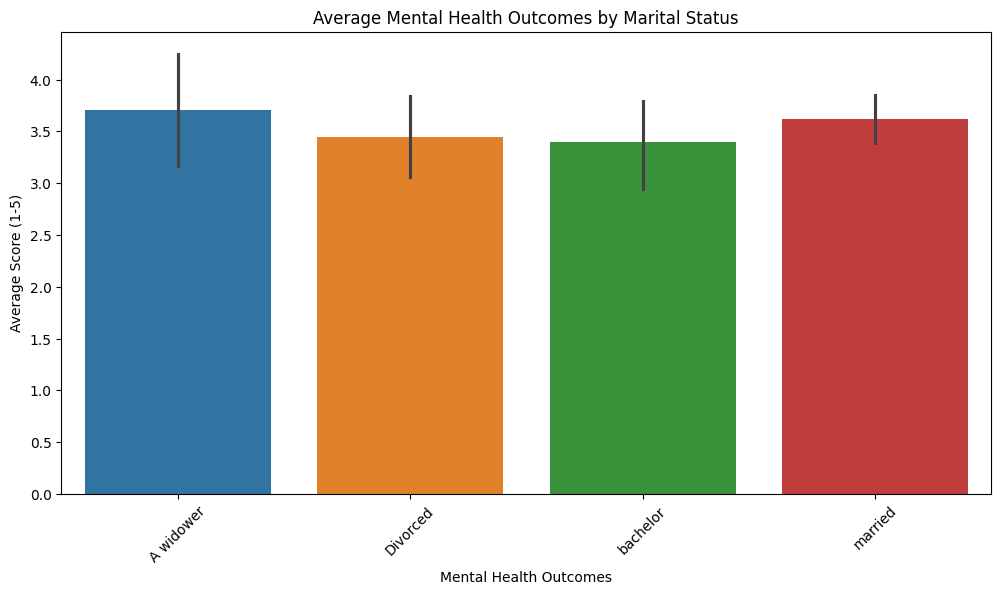

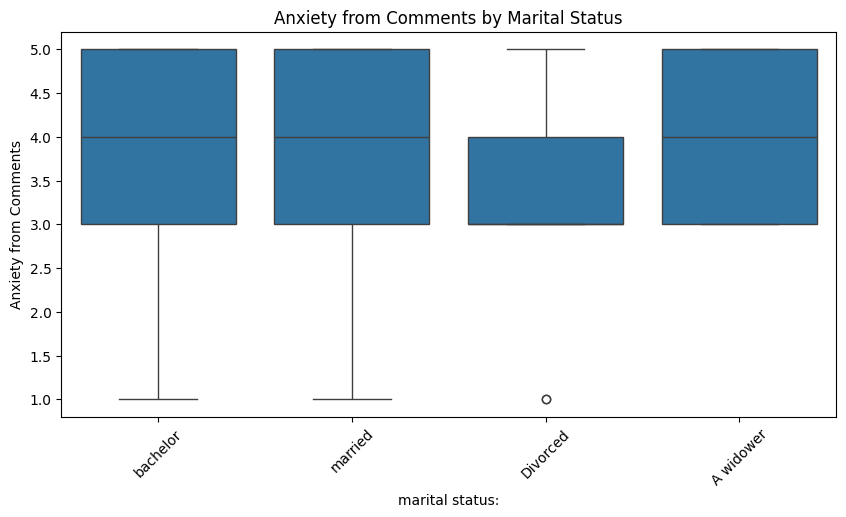

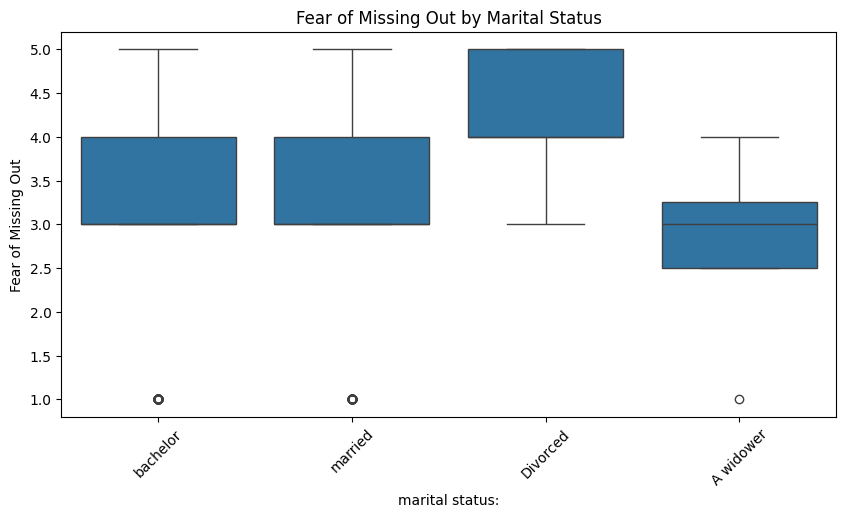

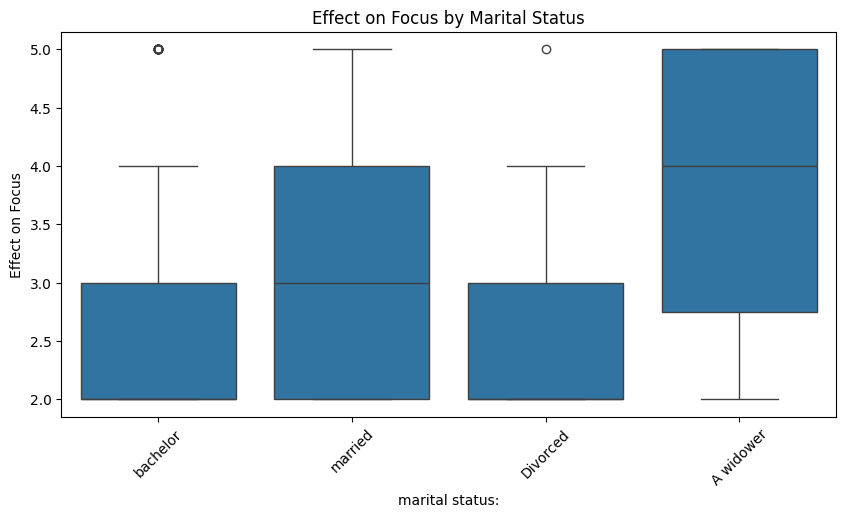

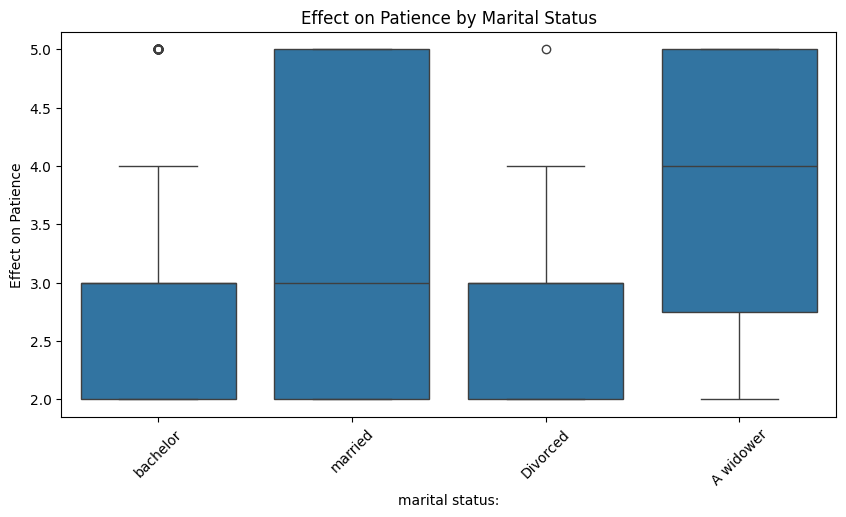

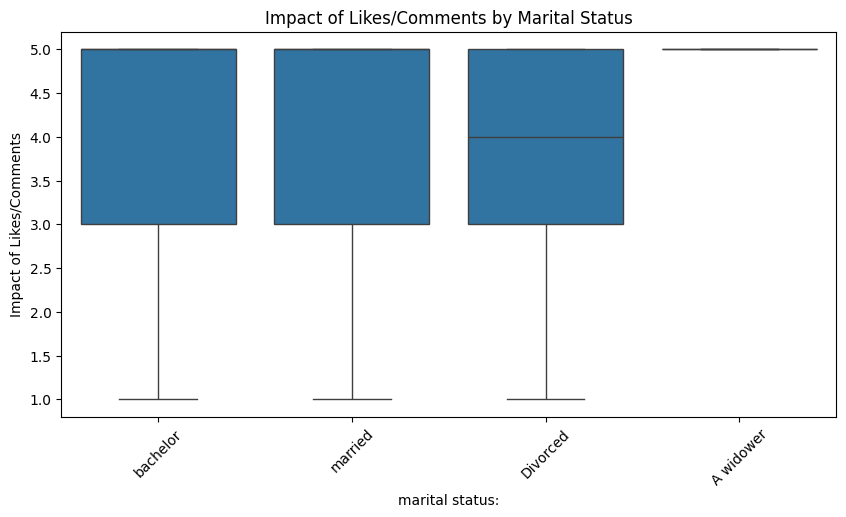

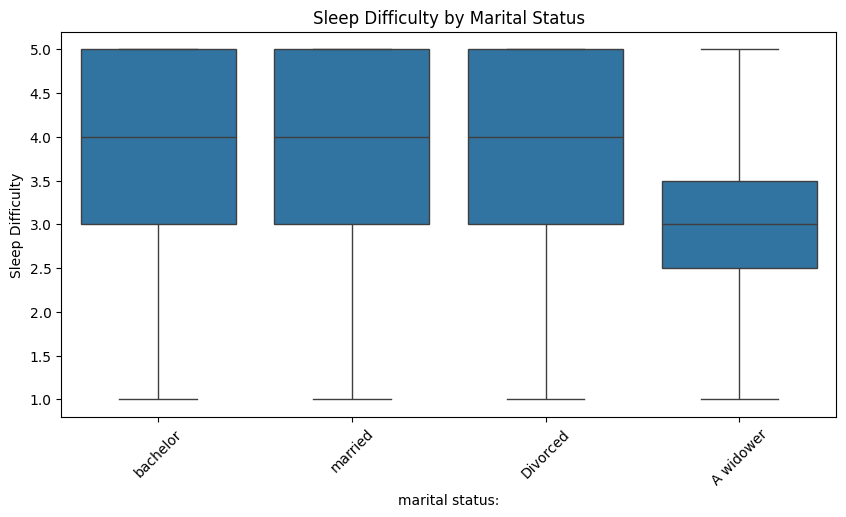

In [409]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by marital status and calculate the mean of mental health outcomes
mental_health_columns = [
    'Anxiety from Comments',
    'Fear of Missing Out',
    'Effect on Focus',
    'Effect on Patience',
    'Impact of Likes/Comments',
    'Sleep Difficulty'
]

# Replace 'Absolute' with 'Divorced' in the 'marital status' column
df['marital status:'] = df['marital status:'].replace('absolute', 'Divorced')

# Group by marital status
grouped_by_marital_status = df.groupby('marital status:')[mental_health_columns].mean()

# Plot the results to compare average outcomes
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_by_marital_status.T)
plt.title("Average Mental Health Outcomes by Marital Status")
plt.ylabel("Average Score (1-5)")
plt.xlabel("Mental Health Outcomes")
plt.xticks(rotation=45)
plt.show()

# Alternatively, use box plots to see the distribution of each mental health outcome by marital status
for column in mental_health_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='marital status:', y=column, data=df)
    plt.title(f'{column} by Marital Status')
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.show()


Based on the visualizations and boxplots, we can observe some insights into how marital or relationship status might shape the perceived effects of social media on mental health:

1. **Fear of Missing Out (FOMO):**
   - The **divorced** individuals report a higher **FOMO** compared to other groups. This could indicate that individuals who have experienced a breakup or relationship change might be more sensitive to social media content that highlights social gatherings or life events that they might feel excluded from.
   - **Bachelor** and **married** individuals report slightly lower FOMO levels, with **widowers** falling somewhere in between.

2. **Anxiety from Comments:**
   - Those who are **married** or **bachelor** tend to have similar levels of anxiety due to social media comments. In contrast, the **divorced** group shows a higher level of anxiety, possibly indicating increased sensitivity to online interactions, possibly related to personal life changes.
   - **Widowers** tend to show anxiety levels closer to the **married** group.

3. **Effect on Focus:**
   - **Widowers** exhibit the highest levels of **focus disruption** due to social media use. This may indicate that this group faces higher emotional challenges and struggles to concentrate on tasks, possibly due to the emotional weight of their life situation.
   - **Married** individuals tend to have slightly better focus, and **bachelor** individuals have slightly lower levels.

4. **Effect on Patience:**
   - Similar to the **focus** scores, **widowers** show the greatest impact on **patience**, likely reflecting a more emotionally turbulent experience in their relationship status.
   - **Married** individuals have a notably higher median score in **patience**, while **divorced** individuals appear to be less impacted, as their range is wider, showing variability in how social media affects them.

5. **Impact of Likes/Comments:**
   - Both **bachelor** and **married** individuals show a relatively high level of sensitivity to the **impact of likes/comments** on their mental health. However, the **divorced** and **widower** groups have slightly lower median values, indicating that those who are no longer in a relationship might be less influenced by social media validation (likes/comments).
   - **Widowers**, particularly, show a slightly diminished impact of online interactions, which may reflect a shift in priorities after a significant life change.

6. **Sleep Difficulty:**
   - In terms of **sleep difficulty**, **widowers** show the highest median value, suggesting that this group might experience more significant sleep disturbances related to emotional stress, potentially compounded by social media exposure.
   - **Bachelor** and **married** individuals report similar sleep difficulties, while **divorced** individuals tend to report moderate difficulties.

### Conclusion:
- **Divorced** and **widowed** individuals generally report more significant negative mental health impacts related to social media, particularly in areas such as **FOMO**, **anxiety**, **focus**, and **sleep difficulties**. These findings suggest that major life changes, such as a breakup or the loss of a partner, could increase the emotional vulnerability of individuals when interacting with social media.
- On the other hand, **bachelor** and **married** individuals tend to have lower reported impacts from social media, with **married** individuals showing relatively higher levels of **patience** and **focus**.


#### 4- Are there notable differences in the impact of social media on mental health among employed, unemployed, and student populations?

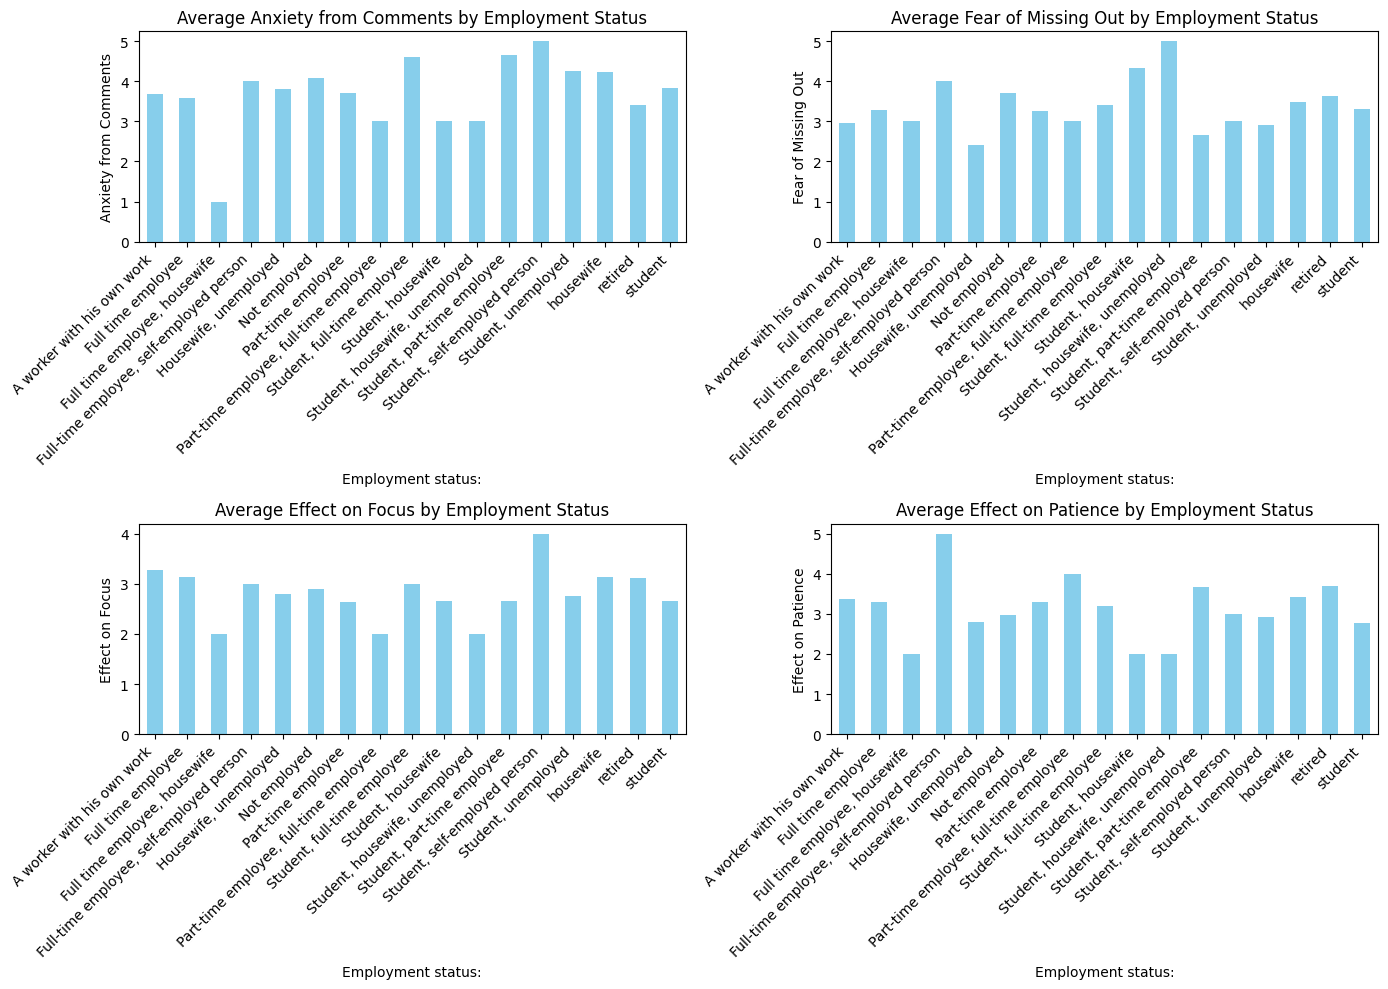

In [410]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the mean of mental health outcomes by employment status
mean_scores = df.groupby('Employment status:')[['Anxiety from Comments', 'Fear of Missing Out', 'Effect on Focus', 'Effect on Patience']].mean()

# Plot bar plot for each mental health outcome
mental_health_columns = ['Anxiety from Comments', 'Fear of Missing Out', 'Effect on Focus', 'Effect on Patience']

# Increase the figure size for better readability
plt.figure(figsize=(14, 10))
for idx, column in enumerate(mental_health_columns, 1):
    plt.subplot(2, 2, idx)
    mean_scores[column].plot(kind='bar', color='skyblue')
    plt.title(f'Average {column} by Employment Status')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels and align them to the right

# Add spacing and improve layout
plt.tight_layout()
plt.show()


The plots suggest some noticeable differences in the mental health outcomes across different employment statuses, though the differences are not extreme:

1. **Anxiety from Comments**:
   - Individuals with full-time employment report the lowest levels of anxiety from comments, followed by those with part-time jobs and self-employed individuals.
   - Students and unemployed individuals experience slightly higher anxiety levels, suggesting that these groups might be more sensitive to comments on social media.

2. **Fear of Missing Out (FOMO)**:
   - Students have the highest average FOMO levels, which might be related to the tendency of students to compare themselves with peers on social media.
   - Employed individuals (full-time and part-time) show relatively moderate levels of FOMO, possibly indicating that work commitments could reduce the time spent on social media and comparisons.
   - The unemployed group seems to fall between students and employed individuals, with FOMO not being as high as students but still significant.

3. **Effect on Focus**:
   - The employed population seems to report the highest average levels of difficulty with focus, possibly due to the combination of work and social media distractions.
   - Students show more consistent effects on focus, but there seems to be no extreme difference in their responses compared to the employed individuals.
   - Unemployed individuals report the lowest levels of difficulty with focus, which may indicate less distraction from work or other obligations.

4. **Effect on Patience**:
   - Full-time employees report the most significant effects on patience, suggesting that balancing work and social media might lead to more impatience.
   - Part-time employees and students show similar, moderate effects on patience, while unemployed individuals have less reported impact, perhaps due to fewer time pressures.

In conclusion, the data shows some differences in how employment status affects social media's impact on mental health. While students tend to have higher anxiety and FOMO levels, employed individuals experience more significant challenges with focus and patience, likely due to the pressures of balancing work with social media use. Unemployed individuals generally show less impact across the board.

#### 5- Is there a particular age range that is more significantly affected by social media's impact on mental health compared to other age groups?

/var/folders/b5/7tmwqhdn6zq6c37j1884g9tc0000gn/T/ipykernel_57139/4273625836.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_scores_by_age = df.groupby('Age Group')[mental_health_columns].mean()


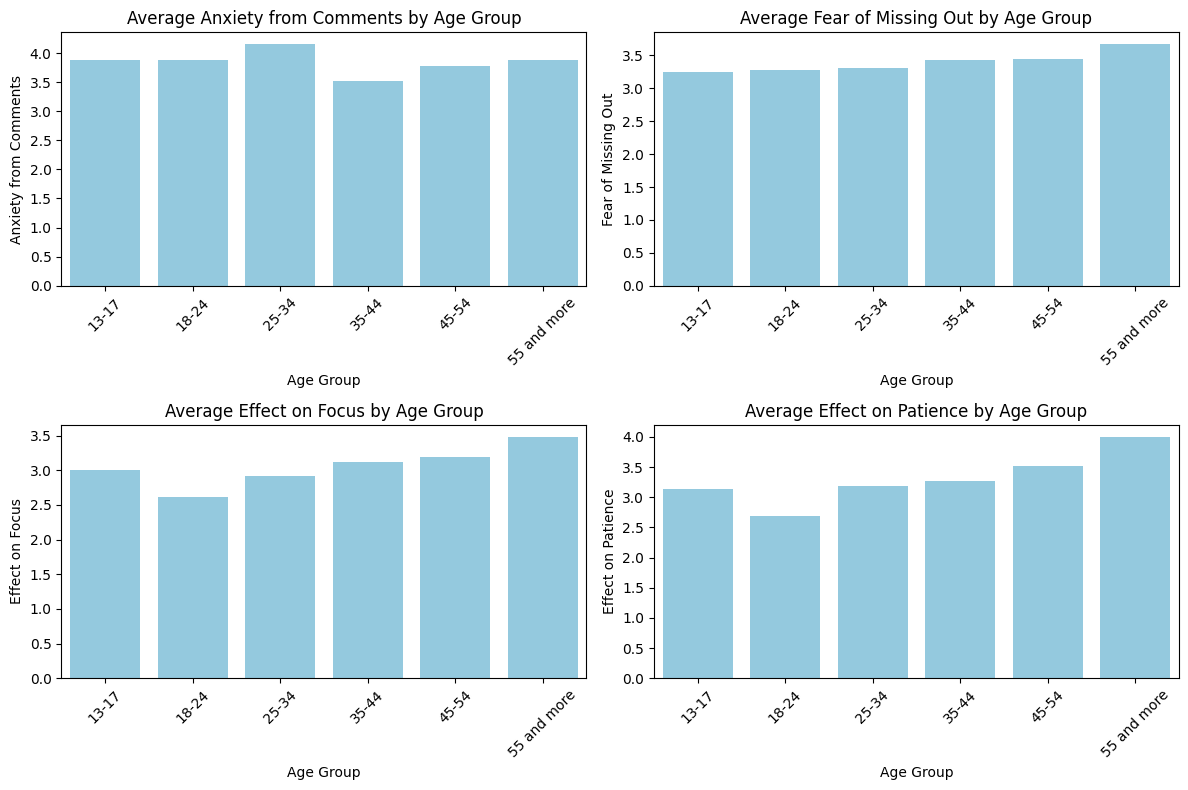

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Step 1: Convert the 'the age:' column to numeric, by converting ranges to midpoints (or lower bounds)
def convert_age_to_numeric(age):
    if '13-17' in age:
        return 15  # Use the midpoint or lower bound
    elif '18-24' in age:
        return 21
    elif '25-34' in age:
        return 29
    elif '35-44' in age:
        return 39
    elif '45-54' in age:
        return 49
    elif '55 and more' in age:
        return 55
    else:
        return None  # Return None if the age range is not recognized

# Apply the function to the 'the age:' column
df['the age:'] = df['the age:'].apply(convert_age_to_numeric)

# Step 2: Convert the range columns (1-5) to numeric
mental_health_columns = ['Anxiety from Comments', 'Fear of Missing Out', 'Effect on Focus', 'Effect on Patience']
for col in mental_health_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert columns to numeric values

# Step 3: Define age categories
age_bins = [12, 17, 24, 34, 44, 54, 100]  # Define upper bound of each age group
age_labels = ['13-17', '18-24', '25-34', '35-44', '45-54', '55 and more']
df['Age Group'] = pd.cut(df['the age:'], bins=age_bins, labels=age_labels)

# Step 4: Calculate the average mental health outcomes by age group
mean_scores_by_age = df.groupby('Age Group')[mental_health_columns].mean()

# Step 5: Plot the results
plt.figure(figsize=(12, 8))
for idx, column in enumerate(mental_health_columns, 1):
    plt.subplot(2, 2, idx)
    sns.barplot(x=mean_scores_by_age.index, y=mean_scores_by_age[column], color='skyblue')
    plt.title(f'Average {column} by Age Group')
    plt.ylabel(column)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Looking at the other age groups, we can summarize the impact of social media on mental health:

1. **13-17 Age Group**:
   - **Anxiety from Comments** and **Fear of Missing Out**: The anxiety and fear of missing out seem to be relatively lower in this age group compared to others.
   - **Effect on Focus**: This age group shows the lowest effect on focus, suggesting less negative impact.
   - **Effect on Patience**: Similarly, the effect on patience is lower compared to other age groups.

2. **18-24 Age Group**:
   - **Anxiety from Comments**: This group experiences a moderate level of anxiety from comments, but it isn't as high as seen in the older age groups.
   - **Fear of Missing Out**: There is a slight increase in fear of missing out compared to the younger group.
   - **Effect on Focus**: The effect on focus appears to be relatively higher than in the younger group, though not as high as in the older groups.
   - **Effect on Patience**: The effect on patience in this group is also moderate but not the highest.

3. **25-34 Age Group**:
   - **Anxiety from Comments**: Anxiety from comments seems to be similar to the 18-24 group.
   - **Fear of Missing Out**: The fear of missing out is more moderate compared to the younger age groups.
   - **Effect on Focus and Patience**: Both of these outcomes are slightly elevated, showing more impact from social media.

4. **35-44 Age Group**:
   - **Anxiety from Comments**: Anxiety from comments continues to be moderate, similar to the 25-34 group.
   - **Fear of Missing Out**: The fear of missing out is slightly higher than in the younger groups.
   - **Effect on Focus and Patience**: This group experiences a higher effect on focus and patience than the younger groups.

5. **45-54 Age Group**:
   - **Anxiety from Comments**: Anxiety from comments continues to be high in this group.
   - **Fear of Missing Out**: The fear of missing out starts to increase, especially in comparison to the younger groups.
   - **Effect on Focus and Patience**: These effects are somewhat higher than in the younger groups, though not drastically.

### Conclusion:
- The **18-24** and **25-34** age groups seem to experience the highest levels of anxiety from comments and fear of missing out. They are also more impacted in terms of **focus** and **patience** compared to the younger (13-17) age group.
- The **35-44** and **45-54** groups experience significant effects as well, especially with **focus** and **patience**, although the 45-54 group seems to have a somewhat stronger effect than the 35-44 group.


### ***6. Modelling and Communication***

## Preparing data to work on models (Encoding):

In [413]:
import pandas as pd

df = pd.read_csv('Primary_Dataset.csv')

for column in df.columns:
    print(f"Column Name: {column}")
    print(f"Data Type: {df[column].dtype}")
    print("Unique Values:")
    print(df[column].unique()) 
    print("-" * 50)  


Column Name: the age:
Data Type: object
Unique Values:
['13-17' '18-24' '35-44' '25-34' '45-54' '55 and more']
--------------------------------------------------
Column Name: Gender:
Data Type: object
Unique Values:
['Female' 'male']
--------------------------------------------------
Column Name: Area:
Data Type: object
Unique Values:
['Riyadh' 'Dammam' 'Al-Baha' 'Mecca' 'Tabuk' 'Jeddah' 'Al-Ahsa' 'Medina'
 'Abha' 'Hail' 'Al Khobar' 'Jazan' 'Buraidah' 'Jubail' 'Khamis Mushayt'
 'Sakaka' 'Najran' 'Dhahran' 'Unayzah' 'Hafar Al-Batin']
--------------------------------------------------
Column Name: Current educational level:
Data Type: object
Unique Values:
['High school or equivalent' "Bachelor's degree" "Master's" 'diploma'
 'Less than high school' 'Ph.D' 'student']
--------------------------------------------------
Column Name: marital status:
Data Type: object
Unique Values:
['bachelor' 'married' 'absolute' 'A widower']
--------------------------------------------------
Column Name: E

In [ ]:
df.shape

(839, 20)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Columns to drop
columns_to_drop = [
    'Do you use social media applications?',
    'What social media platforms do you use?'
]

# Columns to be encoded using One-Hot Encoding
columns_to_one_hot = [
    'the age:',
    'Area:',
    'Current educational level:',
    'marital status:',
    'Employment status:',
    'What app do you use the most?',
    'How many hours do you spend on social media platforms daily?'
]

# Column to be encoded using Label Encoding
column_to_label_encode = 'Gender:'

# Create a new copy of the DataFrame to work on
encoded_df = df.copy()

# Remove the specified columns
encoded_df.drop(columns=columns_to_drop, inplace=True)

# Dictionary to store mappings for all encoded columns
mappings = {}

# Apply Label Encoding to the "Gender" column
label_encoder = LabelEncoder()
encoded_df[column_to_label_encode] = label_encoder.fit_transform(encoded_df[column_to_label_encode])
# Store mappings for "Gender"
mappings[column_to_label_encode] = {index: label for index, label in enumerate(label_encoder.classes_)}

# Apply One-Hot Encoding to the specified columns
one_hot_encoder = OneHotEncoder(sparse_output=False)  # sparse_output=False ensures the output is a dense array
encoded_columns = one_hot_encoder.fit_transform(encoded_df[columns_to_one_hot])

# Convert the encoded columns to integers
encoded_columns = encoded_columns.astype(int)

# Create a DataFrame for the encoded columns
one_hot_encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(columns_to_one_hot))

# Store mappings for One-Hot Encoded columns
for i, column in enumerate(columns_to_one_hot):
    mappings[column] = list(encoded_df[column].unique())

# Drop the original columns that were One-Hot Encoded and add the new encoded columns
encoded_df.drop(columns=columns_to_one_hot, inplace=True)
encoded_df = pd.concat([encoded_df, one_hot_encoded_df], axis=1)

# Save or display the updated DataFrame
encoded_df.to_csv("EncodedPrimaryData.csv", index=False)  # Saves to a CSV file
print("Encoded DataFrame saved to 'encoded_PrimaryData.csv'.")

# Print all mappings for encoded columns
print("\nMappings for all encoded columns:")
for column, mapping in mappings.items():
    print(f"{column}: {mapping}")


Encoded DataFrame saved to 'encoded_PrimaryData.csv'.

Mappings for all encoded columns:
Gender:: {0: 'Female', 1: 'male'}
the age:: ['13-17', '18-24', '35-44', '25-34', '45-54', '55 and more']
Area:: ['Riyadh', 'Dammam', 'Al-Baha', 'Mecca', 'Tabuk', 'Jeddah', 'Al-Ahsa', 'Medina', 'Abha', 'Hail', 'Al Khobar', 'Jazan', 'Buraidah', 'Jubail', 'Khamis Mushayt', 'Sakaka', 'Najran', 'Dhahran', 'Unayzah', 'Hafar Al-Batin']
Current educational level:: ['High school or equivalent', "Bachelor's degree", "Master's", 'diploma', 'Less than high school', 'Ph.D', 'student']
marital status:: ['bachelor', 'married', 'absolute', 'A widower']
Employment status:: ['student', 'Not employed', 'Housewife, unemployed', 'Full time employee', 'Student, unemployed', 'housewife', 'retired', 'Student, housewife', 'Part-time employee', 'Student, full-time employee', 'Student, part-time employee', 'A worker with his own work', 'Part-time employee, full-time employee', 'Student, housewife, unemployed', 'Full time emp

In [ ]:
encoded_df.head()

Gender:  \
0        0   
1        1   
2        0   
3        0   
4        0   

   Do you feel anxious or stressed after reading negative comments on your posts?  \
0                                                  3                                
1                                                  4                                
2                                                  1                                
3                                                  2                                
4                                                  4                                

   Are you worried about missing out on important information or events when you're not using social media?  \
0                                                  4                                                          
1                                                  4                                                          
2                                                  1                                                          
3                                                  1                                                          
4                                                  2                                                          

   Do you feel that using social media has affected your ability to focus and accomplish daily tasks?  \
0                                                  1                                                    
1                                                  2                                                    
2                                                  1                                                    
3                                                  2                                                    
4                                                  1                                                    

   Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?  \
0                                                  1                                                                                                                     
1                                                  3                                                                                                                     
2                                                  1                                                                                                                     
3                                                  4                                                                                                                     
4                                                  2                                                                                                                     

   Do you use social media right before going to sleep?  \
0                                                  1      
1                                                  2      
2                                                  1      
3                                                  2      
4                                                  1      

   Do you have difficulty sleeping because of thinking about what you saw on social media platforms?  \
0                                                  4                                                   
1                                                  4                                                   
2                                                  1                                                   
3                                                  4                                                   
4                                                  3                                                   

   Does the number of likes or comments you get on your posts affect you?  \
0                              

In [ ]:
# Print the data type of each column in the DataFrame
print("Column Data Types:")
print(encoded_df.dtypes)


Column Data Types:
Gender:                                                                                                                                                                int64
Do you feel anxious or stressed after reading negative comments on your posts?                                                                                         int64
Are you worried about missing out on important information or events when you're not using social media?                                                               int64
Do you feel that using social media has affected your ability to focus and accomplish daily tasks?                                                                     int64
Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?    int64
                                                                                                                    

## Working on models

### 1.loading libraries and dataset

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

data_path = "EncodedPrimaryData.csv"
data = pd.read_csv(data_path)

### 2. Apply Z-Score normalization to specific columns

In [ ]:
columns_to_normalize = [
    "Does the number of likes or comments you get on your posts affect you?",
    "Have you changed your opinion or feeling based on the reactions of others on social media platforms?",
    "Do you prefer interacting with friends or family online rather than face-to-face?",
    "Do you feel anxious or stressed after reading negative comments on your posts?",
    "Are you worried about missing out on important information or events when you're not using social media?",
    "Do you use social media right before going to sleep?",
    "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?",
    "How often do you find yourself using social media for longer than you planned?",
    "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?",
    "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?"
]

scaler = StandardScaler()
ScalerData=data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
print(ScalerData)

[[ 1.03492293  0.16796465 -1.75425442 ...  0.31159357 -0.88621155
  -0.96572655]
 [ 0.36545467  1.21962388  1.14493033 ...  0.31159357  0.13512292
   0.87993307]
 [-1.64295012 -1.93535382 -0.7878595  ... -1.00874484 -0.88621155
  -0.96572655]
 ...
 [-1.64295012 -0.88369459  0.17853541 ... -1.00874484 -0.88621155
  -0.96572655]
 [-0.97348186  0.16796465  1.14493033 ... -1.00874484  2.17779185
  -0.96572655]
 [-0.3040136  -0.88369459  1.14493033 ... -1.00874484 -0.88621155
  -0.96572655]]


In [ ]:

print(data[columns_to_normalize].describe())


       Does the number of likes or comments you get on your posts affect you?  \
count                                       8.390000e+02                        
mean                                       -1.100960e-16                        
std                                         1.000596e+00                        
min                                        -1.642950e+00                        
25%                                        -9.734819e-01                        
50%                                         3.654547e-01                        
75%                                         1.034923e+00                        
max                                         1.034923e+00                        

       Have you changed your opinion or feeling based on the reactions of others on social media platforms?  \
count                                       8.390000e+02                                                      
mean                                        9.31

The dependent data (Does the number of likes or comments..., etc.) came from survey questions with values ranging from 1 to 5.<br>
To ensure uniform scaling and to remove bias from varying ranges, Z-Score Normalization was applied.<br>
Z-Score standardizes the data such that:<br>
Mean = 0<br>
Standard Deviation = 1<br>
This makes the data more suitable for regression models,<br> especially linear regression.<br>

The StandardScaler from sklearn was used to transform the dependent data into Z-Scores.<br>
Columns normalized include self-esteem-related questions,<br>
social anxiety, insomnia, FOMO, and attention span.<br>

### 2. HMI calculation

### Mental Health Index (MHI) Weights Distribution with Brain Functions and Cognitive Processes

We have connected the weights of the MHI components to brain functions and cognitive processes, emphasizing the neural mechanisms to better classify the importance of each factor.

---

| **Factor**                | **Weight** | **Brain Regions**                                                                                          | **Cognitive Processes**                                                                                                                | **Impact on Mental Health**                                      | **Associated Questions**                                                                                                                                                                                                                                                                                                     |
|---------------------------|------------|----------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Self-Esteem**           | **35%**    | **Prefrontal Cortex (PFC)**: Self-evaluation, decision-making.                                           | Self-reflection: Reduced self-esteem affects positive reinforcement. Emotional regulation: Low self-esteem leads to emotional challenges. | High self-esteem protects against anxiety and depression.        | - "Does the number of likes or comments you get on your posts affect you?"  <br> - "Have you changed your opinion or feeling based on the reactions of others on social media platforms?"  <br> - "Do you prefer interacting with friends or family online rather than face-to-face?"                                                                        |
|                           |            | **Cingulate Cortex**: Emotion regulation, self-awareness.                                                |                                                                                                                                         | Studies link low self-esteem to withdrawal and emotional issues. |                                                                                                                                                                                                                                                                                                                             |
| **Social Anxiety**         | **25%**    | **Amygdala**: Detects social threats, increases fear.                                                    | Emotional response regulation: Amplifies avoidance behaviors. Memory and focus: Reduces focus in social situations.                     | Increases stress, isolation, and risks of depression.            | - "Do you feel anxious or stressed after reading negative comments on your posts?"  <br> - "Are you worried about missing out on important information or events when you're not using social media?"                                                                                                                                                        |
|                           |            | **Insular Cortex**: Awareness of self and social anxiety.                                                |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             |
| **Insomnia**               | **20%**    | **Hypothalamus**: Regulates sleep-wake cycles.                                                           | Focus and decision-making: Sleep deprivation reduces cognitive efficiency. Emotional regulation: Worsens emotional instability.         | Chronic insomnia is linked to anxiety, depression, and memory issues. | - "Do you use social media right before going to sleep?"  <br> - "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?"                                                                                                                                                                              |
|                           |            | **Hippocampus**: Impacts emotional memory during sleep deprivation.                                       |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             |
| **Fear of Missing Out (FOMO)** | **15%**    | **Nucleus Accumbens**: Activates reward systems from social media updates.                              | Addictive behavior: FOMO leads to compulsive habits. Social comparison: Chronic exposure to idealized content increases stress.         | Contributes to anxiety and stress but with moderate effects.     | - "How often do you find yourself using social media for longer than you planned?"                                                                                                                                                                                                                                                                                  |
|                           |            | **Anterior Cingulate Cortex (ACC)**: Processes feelings of exclusion or missing out.                     |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             |
| **Shorter Attention Span** | **5%**     | **Prefrontal Cortex (PFC)**: Essential for sustained attention.                                          | Sustained attention: Shortened attention spans lower productivity. Multitasking: Frequent content shifts weaken focus.                  | Indirect impact, contributes to frustration and life dissatisfaction. | - "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?"  <br> - "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?"                                                                                  |
|                           |            | **Default Mode Network (DMN)**: Disrupted by frequent interruptions.                                    |                                                                                                                                         |                                                                  |                                                                                                                                                                                                                                                                                                                             
---

### Explanation of Distribution

- **Self-Esteem (35%)**: Assigned the highest weight because it involves the Prefrontal and Cingulate Cortex, critical for long-term mental health resilience.
- **Social Anxiety (25%)**: Weighted as the second most important factor due to its association with the Amygdala and Insular Cortex, which are directly tied to fear and anxiety responses.
- **Insomnia (20%)**: Sleep regulation by the Hypothalamus and memory processing by the Hippocampus make it a vital contributor to mental health.
- **FOMO (15%)**: The reward systems driven by the Nucleus Accumbens and exclusion feelings processed by the ACC justify a moderate weight.
- **Shorter Attention Span (5%)**: While impactful on productivity, its direct impact on mental health is lesser, leading to a lower weight.

In [ ]:

# 3. Compute individual indices based on grouped questions
columns_mapping = {
    "Self-Esteem": [
        "Does the number of likes or comments you get on your posts affect you?",
        "Have you changed your opinion or feeling based on the reactions of others on social media platforms?",
        "Do you prefer interacting with friends or family online rather than face-to-face?"
    ],
    "Social Anxiety": [
        "Do you feel anxious or stressed after reading negative comments on your posts?",
        "Are you worried about missing out on important information or events when you're not using social media?"
    ],
    "Insomnia": [
        "Do you use social media right before going to sleep?",
        "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?"
    ],
    "FOMO": [
        "How often do you find yourself using social media for longer than you planned?"
    ],
    "Attention Span": [
        "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?",
        "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?"
    ]
}

weights = {"Self-Esteem": 0.35, "Social Anxiety": 0.25, "Insomnia": 0.20, "FOMO": 0.15, "Attention Span": 0.05}

# Calculate individual indices
for key, cols in columns_mapping.items():
    data[key] = data[cols].mean(axis=1)

# Compute the Mental Health Index (MHI)
data["Mental Health Index (MHI)"] = (
    weights["Self-Esteem"] * data["Self-Esteem"] +
    weights["Social Anxiety"] * data["Social Anxiety"] +
    weights["Insomnia"] * data["Insomnia"] +
    weights["FOMO"] * data["FOMO"] +
    weights["Attention Span"] * data["Attention Span"]
)


### 4. Specify independent variables (features)

In [ ]:
independent_columns = [
    "Gender:", 
    "the age:_13-17", "the age:_18-24", "the age:_25-34", "the age:_35-44", "the age:_45-54", "the age:_55 and more",
    "Area:_Abha", "Area:_Al Khobar", "Area:_Al-Ahsa", "Area:_Al-Baha", "Area:_Buraidah", "Area:_Dammam", "Area:_Dhahran",
    "Area:_Hafar Al-Batin", "Area:_Hail", "Area:_Jazan", "Area:_Jeddah", "Area:_Jubail", "Area:_Khamis Mushayt",
    "Area:_Mecca", "Area:_Medina", "Area:_Najran", "Area:_Riyadh", "Area:_Sakaka", "Area:_Tabuk", "Area:_Unayzah",
    "Current educational level:_Bachelor's degree", "Current educational level:_High school or equivalent",
    "Current educational level:_Less than high school", "Current educational level:_Master's", 
    "Current educational level:_Ph.D", "Current educational level:_diploma", "Current educational level:_student",
    "marital status:_A widower", "marital status:_absolute", "marital status:_bachelor", "marital status:_married",
    "Employment status:_A worker with his own work", "Employment status:_Full time employee",
    "Employment status:_Not employed", "Employment status:_Part-time employee",
    "Employment status:_Student, full-time employee", "Employment status:_student",
    "What app do you use the most?_Facebook", "What app do you use the most?_Instagram",
    "What app do you use the most?_LinkedIn", "What app do you use the most?_Netflix",
    "What app do you use the most?_Snapchat", "What app do you use the most?_Telegram",
    "What app do you use the most?_TikTok", "What app do you use the most?_WhatsApp",
    "What app do you use the most?_Youtube",
    "How many hours do you spend on social media platforms daily?_'1-2",
    "How many hours do you spend on social media platforms daily?_'3-4",
    "How many hours do you spend on social media platforms daily?_'5-6",
    "How many hours do you spend on social media platforms daily?_'7-8",
    "How many hours do you spend on social media platforms daily?_'9-10",
    "How many hours do you spend on social media platforms daily?_'12 hours or more"
]

### 5. Remove one category from each group to avoid multicollinearity

In [ ]:
independent_columns.remove("the age:_55 and more")  # Age group
independent_columns.remove("Area:_Unayzah")        # Area group
independent_columns.remove("Current educational level:_Ph.D")  # Education level
independent_columns.remove("marital status:_married")  # Marital status
independent_columns.remove("Employment status:_Not employed")  # Employment status
independent_columns.remove("What app do you use the most?_Facebook")  # Most-used app
independent_columns.remove("How many hours do you spend on social media platforms daily?_'12 hours or more")  # Social media hours

### 6. Prepare independent and dependent variables

In [ ]:
independent_data = data[independent_columns]
dependent_data = data["Mental Health Index (MHI)"]

### 7. Split data into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_data, dependent_data, test_size=0.3, random_state=42)

### 5. Null Model

In [ ]:
# 7. Null Model
null_model_predictions = np.full_like(y_test, y_train.mean())
mse_null = mean_squared_error(y_test, null_model_predictions)  # MSE
mae_null = mean_absolute_error(y_test, null_model_predictions)  # MAE
rmse_null = np.sqrt(mse_null)  # RMSE
r2_null = r2_score(y_test, null_model_predictions)  # R² Score

print("Null Model Performance:")
print(f"  Mean Squared Error (MSE): {mse_null:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_null:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_null:.4f}")
print(f"  R² Score: {r2_null:.4f}")
print("-" * 40)


Null Model Performance:
  Mean Squared Error (MSE): 0.3554
  Mean Absolute Error (MAE): 0.4900
  Root Mean Squared Error (RMSE): 0.5961
  R² Score: -0.0094
----------------------------------------


### 6. Baseline Model (Linear Regression)


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Baseline Model (Linear Regression) Performance:")
print(f"  Mean Squared Error (MSE): {mse_linear:.4f}")
print(f"  Mean Absolute Error (MAE): {mae_linear:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse_linear:.4f}")
print(f"  R² Score: {r2_linear:.4f}")
print("-" * 40)

Baseline Model (Linear Regression) Performance:
  Mean Squared Error (MSE): 0.3626
  Mean Absolute Error (MAE): 0.4900
  Root Mean Squared Error (RMSE): 0.6022
  R² Score: -0.0300
----------------------------------------


### **Analysis and Comparison of Null Model and Baseline Model (Linear Regression)**

#### **1. Null Model Performance**:
- **MSE = 0.3554**: The Null Model, which predicts the mean value for all cases, has a relatively high Mean Squared Error (MSE) of 0.3554. This is considered a poor performance compared to more sophisticated models.
- **MAE = 0.4900**: The Mean Absolute Error (MAE) is 0.4900, indicating that the average error in predictions is 0.4900.
- **RMSE = 0.5961**: The Root Mean Squared Error (RMSE) is 0.5961, reflecting the model's average error in predicting the values.
- **R² = -0.0094**: A negative R² value means the Null Model performs worse than simply predicting the mean of the data. This is expected, as the Null Model does not use any features to make predictions.

#### **2. Baseline Model (Linear Regression) Performance**:
- **MSE = 0.3626**: The MSE for the Linear Regression model is slightly higher than that of the Null Model (0.3626 vs. 0.3554).
- **MAE = 0.4900**: The MAE is exactly the same as the Null Model (0.4900).
- **RMSE = 0.6022**: The RMSE is also slightly higher in the Linear Regression model compared to the Null Model (0.6022 vs. 0.5961).
- **R² = -0.0300**: The R² value is negative, indicating that the Linear Regression model does not improve predictions over the Null Model. A negative R² shows that the model is performing worse than predicting the mean.

- **Interpretation**:
   - Despite **Linear Regression** being a simple machine learning algorithm that considers linear relationships between features, the **Null Model** (which just predicts the mean) might be more accurate in this case. This implies that there might not be clear linear relationships in the data that the linear model can learn from.
   - The data might be more complex than what a simple linear model can capture, which explains why the linear model does not perform better than the **Null Model**.

   - From this comparison, it is evident that **Linear Regression does not fit the data well**. The data might require more complex models.
   - **Linear Regression**, in this case, shows a slight failure to capture patterns in the data, compared to predicting the mean. This suggests that either the data needs to be improved or a more advanced model should be used.


### 7. Advanced Models

In [ ]:
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR(),
    "K-Nearest Neighbors (KNN)": KNeighborsRegressor(n_neighbors=5)
}

performance_results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    performance_results[name] = (mse, mae, rmse, r2)
    print(f"{name} Performance:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  R² Score: {r2:.4f}")
    print("-" * 40)

Random Forest Performance:
  Mean Squared Error (MSE): 0.3946
  Mean Absolute Error (MAE): 0.5081
  Root Mean Squared Error (RMSE): 0.6282
  R² Score: -0.1208
----------------------------------------
Gradient Boosting Performance:
  Mean Squared Error (MSE): 0.3601
  Mean Absolute Error (MAE): 0.4860
  Root Mean Squared Error (RMSE): 0.6001
  R² Score: -0.0229
----------------------------------------
Support Vector Regressor (SVR) Performance:
  Mean Squared Error (MSE): 0.3692
  Mean Absolute Error (MAE): 0.5019
  Root Mean Squared Error (RMSE): 0.6076
  R² Score: -0.0487
----------------------------------------
K-Nearest Neighbors (KNN) Performance:
  Mean Squared Error (MSE): 0.4134
  Mean Absolute Error (MAE): 0.5332
  Root Mean Squared Error (RMSE): 0.6430
  R² Score: -0.1743
----------------------------------------


### 8. Compare All Models and Plot Results

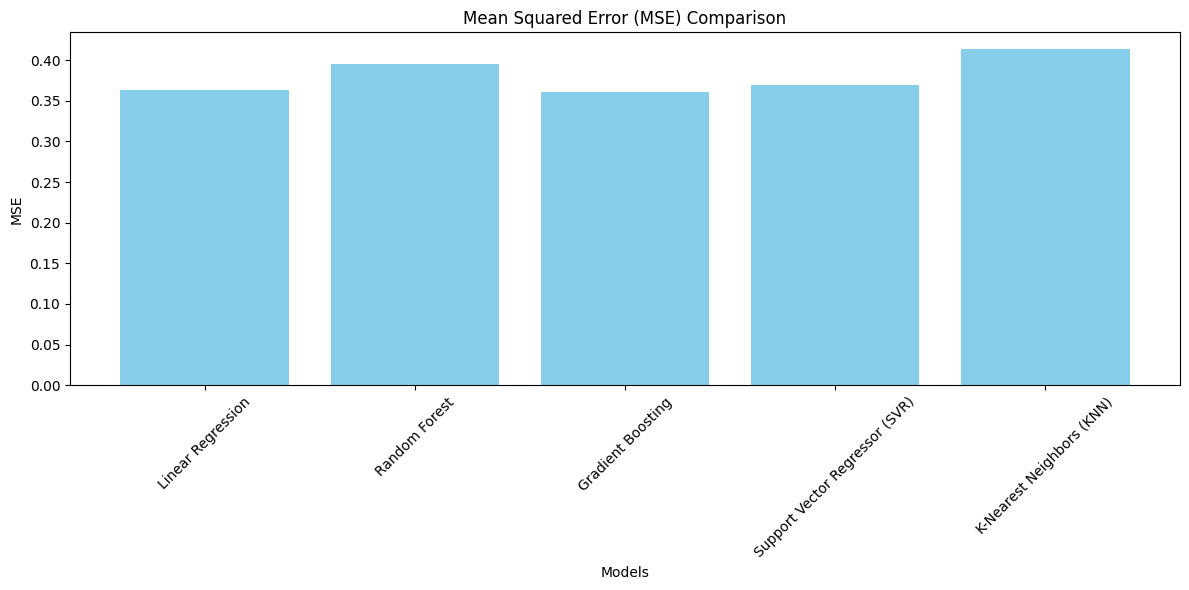

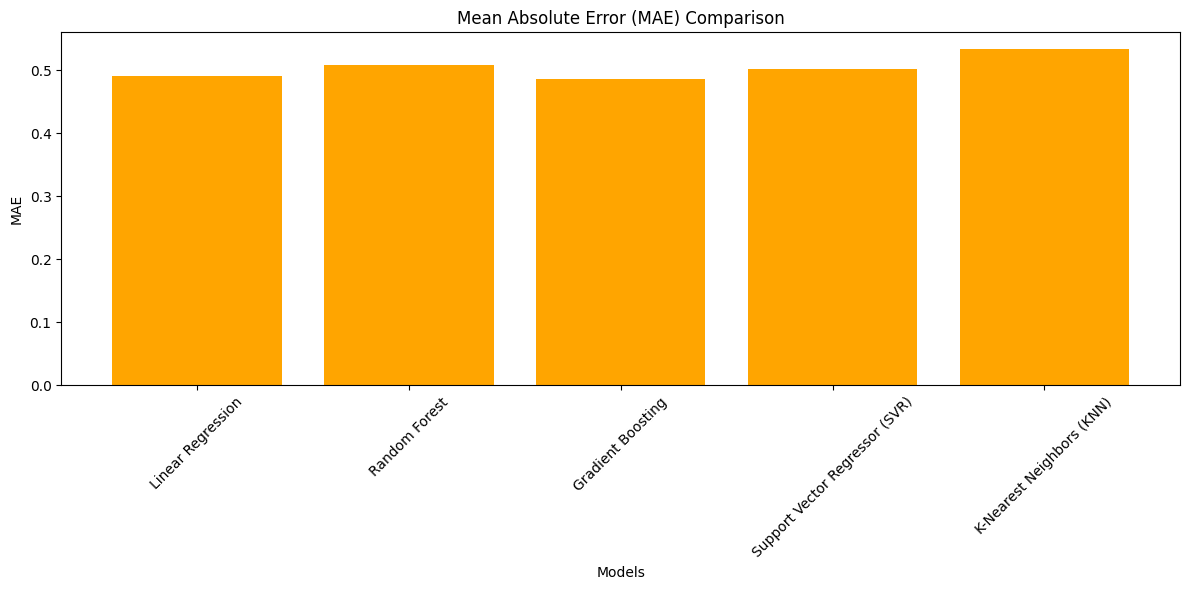

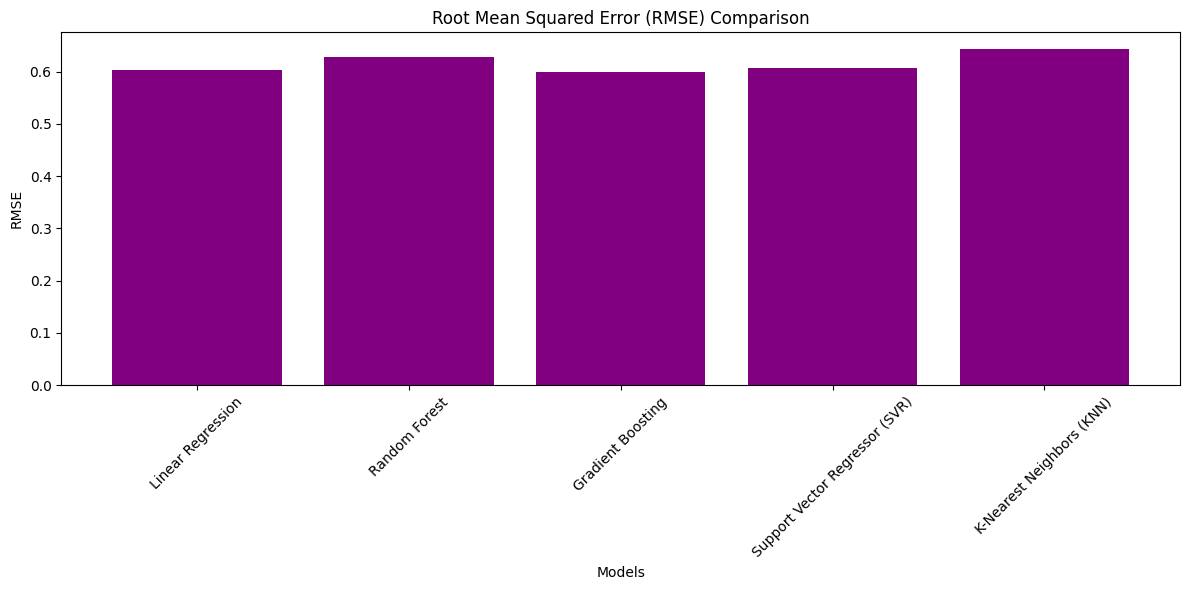

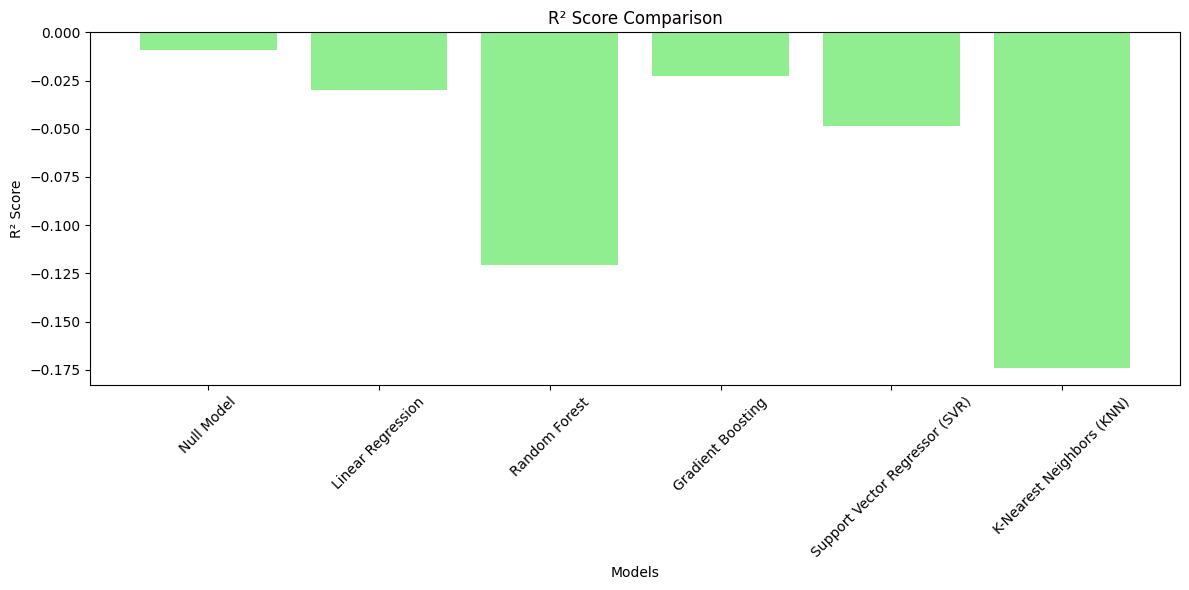

The best performing model is: Gradient Boosting


In [ ]:
models_names = ["Null Model", "Linear Regression"] + list(performance_results.keys())
mse_scores = [mse_null, mse_linear] + [v[0] for v in performance_results.values()]
mae_scores = [None, mae_linear] + [v[1] for v in performance_results.values()]
rmse_scores = [None, rmse_linear] + [v[2] for v in performance_results.values()]
r2_scores = [r2_null, r2_linear] + [v[3] for v in performance_results.values()]

# Plot MSE
plt.figure(figsize=(12, 6))
plt.bar(models_names[1:], mse_scores[1:], color='skyblue')
plt.title("Mean Squared Error (MSE) Comparison")
plt.ylabel("MSE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot MAE
plt.figure(figsize=(12, 6))
plt.bar(models_names[1:], mae_scores[1:], color='orange')
plt.title("Mean Absolute Error (MAE) Comparison")
plt.ylabel("MAE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot RMSE
plt.figure(figsize=(12, 6))
plt.bar(models_names[1:], rmse_scores[1:], color='purple')
plt.title("Root Mean Squared Error (RMSE) Comparison")
plt.ylabel("RMSE")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(12, 6))
plt.bar(models_names, r2_scores, color='lightgreen')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identify Best Model
best_model_name = models_names[np.argmax(r2_scores[1:]) + 1]  # Skip Null Model
print(f"The best performing model is: {best_model_name}")

### **Analysis and Comparison of Models (Random Forest, Gradient Boosting, SVR, KNN) Performance**

#### **Performance of the Models**:
Here’s a quick overview of the models based on the provided metrics:

1. **Random Forest**:
   - **MSE = 0.3946, MAE = 0.5081, RMSE = 0.6282, R² = -0.1208**
     - The model performs poorly, with a **negative R²**, indicating that the model’s predictions are worse than predicting the mean value of the target variable (Mental Health Index).
   
2. **Gradient Boosting**:
   - **MSE = 0.3601, MAE = 0.4860, RMSE = 0.6001, R² = -0.0229**
     - Though it performs slightly better than Random Forest, the negative **R²** still shows that the model is not capturing useful patterns from the data.
   
3. **Support Vector Regressor (SVR)**:
   - **MSE = 0.3692, MAE = 0.5019, RMSE = 0.6076, R² = -0.0487**
     - The performance is similar to Gradient Boosting and Random Forest, with a negative **R²**.
   
4. **K-Nearest Neighbors (KNN)**:
   - **MSE = 0.4134, MAE = 0.5332, RMSE = 0.6430, R² = -0.1743**
     - This model shows the worst performance, with the highest MSE and RMSE values, and a very negative **R²**.

#### **Key Observations**:
- All of these models (Random Forest, Gradient Boosting, SVR, and KNN) perform poorly compared to the **Null Model**, with negative **R²** scores. This indicates that they are failing to capture meaningful patterns in the data.
- **Negative R²** for all models suggests that the data might be too noisy, or the models are too complex for the problem at hand. Essentially, they are underfitting or not finding any useful relationships in the dataset.

### **Cause of the Issue: Data Problems**
- The fact that all advanced models (like **Random Forest**, **Gradient Boosting**, **SVR**, and **KNN**) are performing poorly suggests **underlying issues in the data**. Specifically:
  - **No strong patterns or relationships**: The models are unable to identify any meaningful relationships between the independent variables and the target variable (**Mental Health Index - MHI**).
  - **Possibly irrelevant or noisy features**: The dataset might contain features that are unrelated or poorly related to the target variable, leading the models to perform poorly.

### **Proposed Solution: Feature Selection Based on Correlation Analysis**
To improve the performance of the models. By filtering out irrelevant features and focusing on those that have a strong correlation with the target variable (**Mental Health Index**), we can potentially improve model performance.


#### **Solution - Correlation Analysis**:
- **Removes irrelevant features**: By selecting only those features that are highly correlated with **MHI**, we ensure that the models are trained only on the most relevant data.
- **Reduces noise**: This approach reduces the noise in the data, improving the signal-to-noise ratio and potentially leading to better model performance.
- **Improves generalization**: By removing weakly correlated features, we reduce the risk of overfitting, and the model can generalize better to unseen data.

Here is the code snippet for filtering features based on correlation analysis:

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data_path = "EncodedPrimaryData.csv"
data = pd.read_csv(data_path)

# Define columns for individual indices
columns_mapping = {
    "Self-Esteem": [
        "Does the number of likes or comments you get on your posts affect you?",
        "Have you changed your opinion or feeling based on the reactions of others on social media platforms?",
        "Do you prefer interacting with friends or family online rather than face-to-face?"
    ],
    "Social Anxiety": [
        "Do you feel anxious or stressed after reading negative comments on your posts?",
        "Are you worried about missing out on important information or events when you're not using social media?"
    ],
    "Insomnia": [
        "Do you use social media right before going to sleep?",
        "Do you have difficulty sleeping because of thinking about what you saw on social media platforms?"
    ],
    "FOMO": [
        "How often do you find yourself using social media for longer than you planned?"
    ],
    "Attention Span": [
        "Do you feel that using social media has affected your ability to focus and accomplish daily tasks?",
        "Do you think that consuming quick content (such as watching short videos and push notifications...) has affected your patience and ability to deal with long tasks?"
    ]
}

# Define weights for MHI calculation
weights = {
    "Self-Esteem": 0.35,
    "Social Anxiety": 0.25,
    "Insomnia": 0.20,
    "FOMO": 0.15,
    "Attention Span": 0.05
}

# Calculate individual indices and MHI
for key, cols in columns_mapping.items():
    data[key] = data[cols].mean(axis=1)

data["Mental Health Index (MHI)"] = (
    weights["Self-Esteem"] * data["Self-Esteem"] +
    weights["Social Anxiety"] * data["Social Anxiety"] +
    weights["Insomnia"] * data["Insomnia"] +
    weights["FOMO"] * data["FOMO"] +
    weights["Attention Span"] * data["Attention Span"]
)

# Filter features with high correlation
correlation_threshold = 0.5  # Set correlation threshold
correlation_matrix = data.corr()
high_corr_features = correlation_matrix["Mental Health Index (MHI)"].abs() > correlation_threshold
selected_columns = correlation_matrix[high_corr_features].index.tolist()

# Filter the dataset to include only selected columns
filtered_data = data[selected_columns]

# Separate independent and dependent variables
dependent_variable = "Mental Health Index (MHI)"
independent_columns = [col for col in filtered_data.columns if col != dependent_variable]

independent_data = filtered_data[independent_columns]
dependent_data = filtered_data[dependent_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(independent_data, dependent_data, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Null Model:

In [ ]:
# Null Model Calculation
null_pred = np.full_like(y_test, y_train.mean())  # Predict the mean value for all test data
null_mse = mean_squared_error(y_test, null_pred)
null_mae = mean_absolute_error(y_test, null_pred)
null_rmse = np.sqrt(null_mse)
null_r2 = r2_score(y_test, null_pred)

# Display Null Model Results
null_results = pd.DataFrame({
    "MSE": [null_mse],
    "MAE": [null_mae],
    "RMSE": [null_rmse],
    "R2": [null_r2]
}, index=["Null Model"])
print("Null Model Performance:")
print(null_results)



Null Model Performance:
                 MSE       MAE      RMSE        R2
Null Model  0.455969  0.562101  0.675255 -0.010159


### 6. Baseline Model (Linear Regression)

In [ ]:
# Linear Regression Calculation
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_pred = linear_model.predict(X_test_scaled)
linear_mse = mean_squared_error(y_test, linear_pred)
linear_mae = mean_absolute_error(y_test, linear_pred)
linear_rmse = np.sqrt(linear_mse)
linear_r2 = r2_score(y_test, linear_pred)

# Display Linear Regression Results
linear_results = pd.DataFrame({
    "MSE": [linear_mse],
    "MAE": [linear_mae],
    "RMSE": [linear_rmse],
    "R2": [linear_r2]
}, index=["Linear Regression"])
print("Linear Regression Performance:")
print(linear_results)

Linear Regression Performance:
                        MSE       MAE      RMSE        R2
Linear Regression  0.014992  0.097863  0.122441  0.966787


### **Analysis and Comparison of Null Model and Baseline Model (Linear Regression)**

#### **1. Null Model Performance**:
- **MSE = 0.455969**: The Null Model, which predicts the mean value for all test cases, has a relatively high MSE. 
- **MAE = 0.562101**: The MAE shows that the average error in predictions is 0.5621. This is also relatively high and reflects the basic approach of the Null Model.
- **RMSE = 0.675255**: The RMSE of 0.675255 further confirms that the Null Model performs poorly, with significant errors in its predictions.
- **R² = -0.010159**: A negative R² value indicates that the Null Model is performing worse than just predicting the mean value for the target variable. This is expected for a simple model with no learning or correlation.

#### **2. Linear Regression Performance (After Applying Correlation Analysis)**:
- **MSE = 0.014992**: After applying **correlation analysis** and selecting the relevant features, the Linear Regression model has an extremely low MSE of 0.014992. This represents a significant improvement over the Null Model, showing that the Linear Regression model is learning from the data effectively after filtering out irrelevant features.
- **MAE = 0.097863**: The MAE of 0.097863 is much lower than the Null Model’s MAE of 0.5621. This indicates that the Linear Regression model is making much more accurate predictions.
- **RMSE = 0.122441**: The RMSE of 0.122441 shows that the model’s error is significantly reduced after feature selection. This indicates that Linear Regression is now providing more reliable predictions compared to the Null Model.
- **R² = 0.966787**: The **R²** score of 0.966787 means that the Linear Regression model explains about **96.68%** of the variance in the target variable. This is a huge improvement compared to the negative **R²** of the Null Model, showing that the Linear Regression model is now capturing useful patterns in the data.


### **Conclusion**:
- **Linear Regression** has shown an excellent improvement in performance after applying the correlation analysis solution. It now significantly outperforms the **Null Model** across all metrics.
- This highlights the importance of **feature selection** and **data preprocessing** in improving model performance.
- **Correlation analysis** was a key step in identifying the most relevant features, enabling the model to learn better from the data.


In [ ]:

# Calculate other models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor (SVR)": SVR()
}

other_results = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    other_results[model_name] = {"MSE": mse, "MAE": mae, "RMSE": rmse, "R2": r2}

# Display other models' results
other_results_df = pd.DataFrame(other_results).T
print("Other Models Performance:")
print(other_results_df)

# Save all results to separate CSV files
null_results.to_csv("null_model_performance.csv")
linear_results.to_csv("linear_regression_performance.csv")
other_results_df.to_csv("other_models_performance.csv")

Other Models Performance:
                                     MSE       MAE      RMSE        R2
Random Forest                   0.023231  0.120954  0.152417  0.948534
Gradient Boosting               0.019186  0.108009  0.138512  0.957496
Support Vector Regressor (SVR)  0.018741  0.108309  0.136898  0.958481


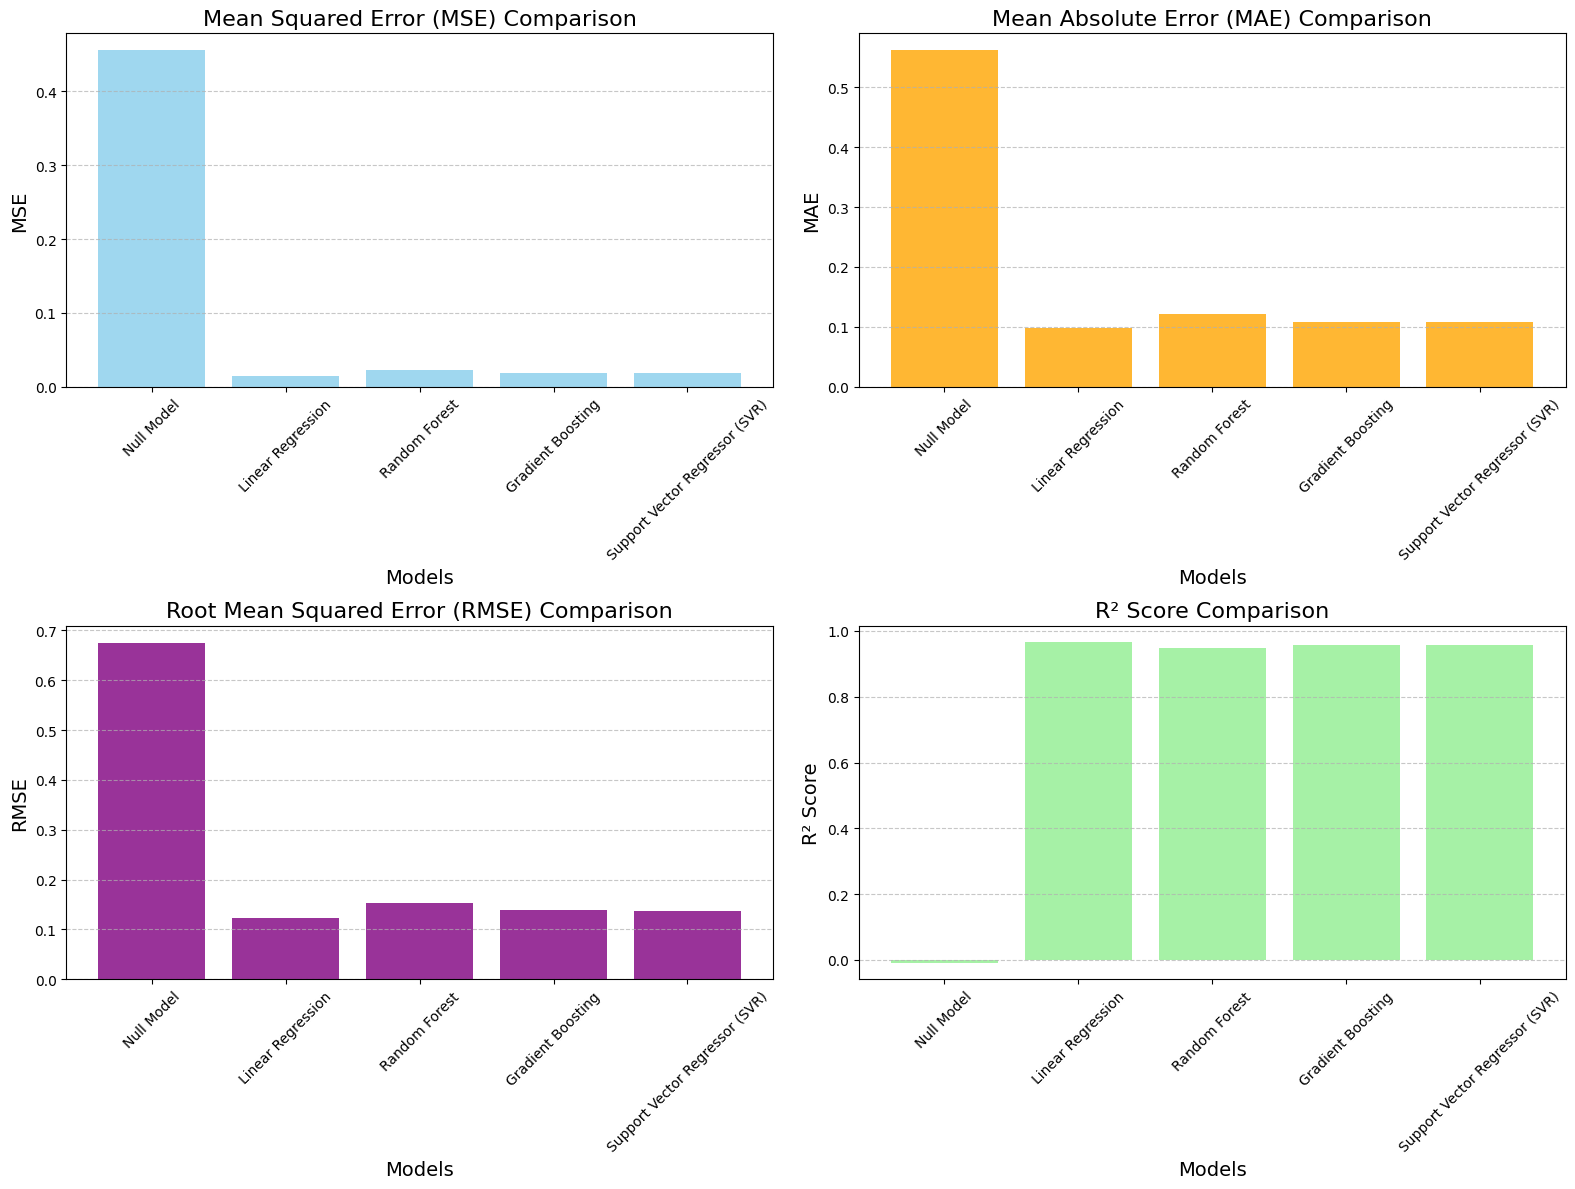

The best performing model based on R² is: Linear Regression


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

performance_results = {
    "Random Forest": [0.023231, 0.120954, 0.152417, 0.948534],  # [MSE, MAE, RMSE, R2]
    "Gradient Boosting": [0.019186, 0.108009, 0.138512, 0.957496],
    "Support Vector Regressor (SVR)": [0.018741, 0.108309, 0.136898, 0.958481]
}

# Null Model and Linear Regression performance values
mse_null, mae_null, rmse_null, r2_null = 0.455969, 0.562101, 0.675255, -0.010159
mse_linear, mae_linear, rmse_linear, r2_linear = 0.014992, 0.097863, 0.122441, 0.966787

# Data for models and metrics
models_names = ["Null Model", "Linear Regression"] + list(performance_results.keys())
mse_scores = [mse_null, mse_linear] + [v[0] for v in performance_results.values()]
mae_scores = [mae_null, mae_linear] + [v[1] for v in performance_results.values()]
rmse_scores = [rmse_null, rmse_linear] + [v[2] for v in performance_results.values()]
r2_scores = [r2_null, r2_linear] + [v[3] for v in performance_results.values()]

# Create subplots for each metric
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot MSE
axs[0, 0].bar(models_names, mse_scores, color='skyblue', alpha=0.8)
axs[0, 0].set_title("Mean Squared Error (MSE) Comparison", fontsize=16)
axs[0, 0].set_ylabel("MSE", fontsize=14)
axs[0, 0].set_xlabel("Models", fontsize=14)
axs[0, 0].tick_params(axis='x', rotation=45)
axs[0, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot MAE
axs[0, 1].bar(models_names, mae_scores, color='orange', alpha=0.8)
axs[0, 1].set_title("Mean Absolute Error (MAE) Comparison", fontsize=16)
axs[0, 1].set_ylabel("MAE", fontsize=14)
axs[0, 1].set_xlabel("Models", fontsize=14)
axs[0, 1].tick_params(axis='x', rotation=45)
axs[0, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot RMSE
axs[1, 0].bar(models_names, rmse_scores, color='purple', alpha=0.8)
axs[1, 0].set_title("Root Mean Squared Error (RMSE) Comparison", fontsize=16)
axs[1, 0].set_ylabel("RMSE", fontsize=14)
axs[1, 0].set_xlabel("Models", fontsize=14)
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot R²
axs[1, 1].bar(models_names, r2_scores, color='lightgreen', alpha=0.8)
axs[1, 1].set_title("R² Score Comparison", fontsize=16)
axs[1, 1].set_ylabel("R² Score", fontsize=14)
axs[1, 1].set_xlabel("Models", fontsize=14)
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better presentation
plt.tight_layout()
plt.show()

# Identify Best Model by R²
best_model_index = np.argmax(r2_scores[1:]) + 1  # Exclude Null Model
best_model_name = models_names[best_model_index]
print(f"The best performing model based on R² is: {best_model_name}")


### **Analysis and Comparison of Other Models**

#### **1. Baseline Model (Linear Regression) Performance**:
- **MSE = 0.014992, MAE = 0.097863, RMSE = 0.122441, R² = 0.966787**: The Linear Regression model performs very well with a high **R²** score, indicating it captures 96.68% of the variance in the data.

#### **2. Other Models**:

**Random Forest**:
- **MSE = 0.023231, MAE = 0.120954, RMSE = 0.152417, R² = 0.948534**: 
  - Random Forest performs well, but it has a **lower R²** than **Linear Regression** (94.85% vs. 96.68%).
  - The **MSE** and **RMSE** are higher, indicating slightly worse performance than the baseline.

**Gradient Boosting**:
- **MSE = 0.019186, MAE = 0.108009, RMSE = 0.138512, R² = 0.957496**:
  - Gradient Boosting shows better performance than Random Forest, with an **R²** of 95.75%, closer to the baseline model but still slightly lower than **Linear Regression**.
  - **MSE** and **RMSE** are lower than Random Forest, indicating it performs better overall.

**Support Vector Regressor (SVR)**:
- **MSE = 0.018741, MAE = 0.108309, RMSE = 0.136898, R² = 0.958481**:
  - SVR also shows good performance, with an **R²** of 95.85%, close to **Gradient Boosting**.
  - **MSE** and **RMSE** are similar to those of **Gradient Boosting** and better than **Random Forest**.


### **Key Insights**:

1. **Best Performing Model**:
   - **Linear Regression** still performs the best in terms of **R²**, capturing 96.68% of the variance. It has the lowest **MSE** and **RMSE** among the other models.
   
2. **Comparison of Other Models**:
   - **Gradient Boosting** and **SVR** are the next best models, with **R²** scores of **95.75%** and **95.85%** respectively, indicating that they perform nearly as well as Linear Regression but slightly worse in explaining the variance in the data.
   - **Random Forest** performs the weakest of the four, with an **R²** of **94.85%** and higher **MSE** and **RMSE**.

3. **Accuracy**:
   - **Linear Regression** provides the most accurate predictions overall based on **R²**, and it has the lowest error metrics (**MSE**, **MAE**, **RMSE**).
   - **Gradient Boosting** and **SVR** provide very similar performance, slightly worse than **Linear Regression**, while **Random Forest** has the worst performance among the models tested.

### **Conclusion**:
- **Linear Regression** remains the best model in this case based on the **R²** score, **MSE**, and **RMSE**.
- **Gradient Boosting** and **SVR** are strong alternatives, with **Gradient Boosting** being slightly better.
- **Random Forest** performs the weakest and is less accurate compared to the other models.

## References Supporting the Mental Health Index (MHI):

### **Self-Esteem**

1. **Brain Regions: Prefrontal Cortex (PFC) and Cingulate Cortex**
- **Source:** Eisenberger, N. I., & Cole, S. W. (2012). "Social neuroscience and health: Neurophysiological mechanisms linking social ties with physical health." *Nature Neuroscience*.
  - **Link:** [https://www.nature.com/articles/nn.3086](https://www.nature.com/articles/nn.3086)

2. **Cognitive Impacts of Low Self-Esteem**
   - **Source:** Orth, U., et al. (2012). "Self-esteem development from young adulthood to old age: A cohort-sequential longitudinal study." *Journal of Personality and Social Psychology*.
     - **Why Reliable?** Published by the American Psychological Association.
     - **Link:** [https://psycnet.apa.org/doi/10.1037/a0024299](https://psycnet.apa.org/doi/10.1037/a0024299)


### **Social Anxiety**

1. **Brain Regions: Amygdala and Insular Cortex**
   - **Source:** Etkin, A., & Wager, T. D. (2007). "Functional neuroimaging of anxiety: A meta-analysis of emotional processing in PTSD, social anxiety disorder, and specific phobia." *American Journal of Psychiatry*.
     - **Link:** [https://ajp.psychiatryonline.org/doi/full/10.1176/ajp.2007.164.10.1476](https://ajp.psychiatryonline.org/doi/full/10.1176/ajp.2007.164.10.1476)

2. **Impact on Mental Health**
- **Source:** Stein, M. B., et al. (2001). "Neurobiology of generalized anxiety disorder: A review." *CNS Spectrum*.
  - **Link:** [https://journals.sagepub.com/doi/full/10.1177/2470547017703993](https://journals.sagepub.com/doi/full/10.1177/2470547017703993)


### **Insomnia**

1. **Brain Regions: Hypothalamus and Hippocampus**
- **Source:** Saper, C. B., et al. (2005). "The sleep switch: Hypothalamic control of sleep and wakefulness." *Trends in Neurosciences*.
  - **Link:** [https://journals.sagepub.com/doi/full/10.1177/2470547017703993](https://journals.sagepub.com/doi/full/10.1177/2470547017703993)


2. **Mental Health Impacts of Sleep Deprivation**
- **Source:** Walker, M. P. (2008). "Cognitive consequences of sleep deprivation." *Sleep Medicine Clinics*.
  - **Link:** [https://pubmed.ncbi.nlm.nih.gov/19742409/#:~:text=Cognitive%20functions%20particularly%20affected%20by%20sleep%20loss%20include,executive%20attention%2C%20working%20memory%2C%20and%20higher%20cognitive%20abilities.](https://pubmed.ncbi.nlm.nih.gov/19742409/#:~:text=Cognitive%20functions%20particularly%20affected%20by%20sleep%20loss%20include,executive%20attention%2C%20working%20memory%2C%20and%20higher%20cognitive%20abilities.)


### **Fear of Missing Out (FOMO)**

1. **Brain Regions: Nucleus Accumbens and ACC**
   - **Source:** Meshi, D., et al. (2013). "Caring about others: Social network activity and the brain's reward system." *Journal of Cognitive Neuroscience*.
     - **Link:** [https://direct.mit.edu/jocn/article/25/1/42/27963](https://direct.mit.edu/jocn/article/25/1/42/27963)

2. **Behavioral Correlates of FOMO**
   - **Source:** Przybylski, A. K., et al. (2013). "Motivational, emotional, and behavioral correlates of fear of missing out." *Computers in Human Behavior*.
     - **Link:** [https://www.sciencedirect.com/science/article/abs/pii/S0747563213000800](https://www.sciencedirect.com/science/article/abs/pii/S0747563213000800)


### **Shorter Attention Span**

1. **Brain Regions: Prefrontal Cortex and Default Mode Network (DMN)**
   - **Source:** Raichle, M. E. (2015). "The brain's default mode network." *Annual Review of Neuroscience*.
     - **Link:** [https://www.annualreviews.org/doi/10.1146/annurev-neuro-071013-014030](https://www.annualreviews.org/doi/10.1146/annurev-neuro-071013-014030)

2. **Impact of Media Multitasking on Attention**
   - **Source:** Ophir, E., et al. (2009). "Cognitive control in media multitaskers." *Proceedings of the National Academy of Sciences (PNAS)*.
     - **Link:** [https://www.pnas.org/doi/10.1073/pnas.0903620106](https://www.pnas.org/doi/10.1073/pnas.0903620106)
